# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option( 'display.max_rows' , 10)
pd.set_option( 'display.max_columns' , 500)

# Reading and Understanding data

In [3]:
telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
telecom_data.shape

(99999, 226)

In [5]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Handling missing values

In [7]:
telecom_data.isnull().sum()/len(telecom_data.index)*100

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [8]:
# Cheking percent of missing values in columns
null_value_col = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
null_value_col

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [9]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(null_value_col.index[null_value_col['null'] > 30])
print(len(col_list_missing_30), "columns having missing values > 30%, Hence removing those from dataframe 'telecom_data'")
col_list_missing_30

40 columns having missing values > 30%, Hence removing those from dataframe 'telecom_data'


['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [10]:
# Delete the columns having more than 30% missing values
telecom_data = telecom_data.drop(col_list_missing_30, axis=1)
telecom_data.shape

(99999, 186)

In [11]:
# List the date columns
date_cols = [k for k in telecom_data.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [12]:
# Dropping date columns
telecom_data = telecom_data.drop(date_cols, axis=1)

In [13]:
# Drop circle_id column
telecom_data = telecom_data.drop('circle_id', axis=1)

In [14]:
telecom_data.shape

(99999, 177)

#### Filter high-value customers

#### In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

In [15]:
#Creating column gp_avg_rech_amt by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
telecom_data['gp_avg_rech_amt'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'])/2
telecom_data.head(2)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,gp_avg_rech_amt
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.2,3.58,307.0
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.0,0.0,0.0,0.0,0.0,2.91,0.0,0.0,35.39,150.51,299.54,72.11,0.23,4.11,0.0,0.0,0.0,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.0,8.93,3.61,0.0,19.09,104.23,408.43,173.03,0.0,0.0,2.35,0.0,5.9,0.0,12.49,15.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.9,0.0,14.84,15.01,26.83,104.23,423.28,188.04,0.0,0.0,0.0,0.0,1.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,11,5,74,384,28

In [16]:
# Finding the 70th percentile of the gp_avg_rech_amt
X = np.percentile(telecom_data['gp_avg_rech_amt'], 70)
print(X)

368.5


In [17]:
#Filter the customers, who have recharged more than or equal to X.
telecom_data = telecom_data[telecom_data['gp_avg_rech_amt'] >= X]
print(telecom_data.shape)
print(f"So out of the total data {telecom_data.shape[0]} customers are classified as 'High Value Customers'.")
telecom_data.head(2)


(30011, 178)
So out of the total data 30011 customers are classified as 'High Value Customers'.


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,gp_avg_rech_amt
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.5,0.0,6.50,NaN,0.0,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,0.0,0.0,0.0,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.0,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.0,81.43,23.83,15.79,21

In [18]:
# Checking the missing values in columns again
null_value_col = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
null_value_col

,null
std_og_t2t_mou_9,5.68
offnet_mou_9,5.68
std_ic_mou_9,5.68
std_og_t2c_mou_9,5.68
loc_og_t2t_mou_9,5.68
...,...
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00


In [19]:
# Listing the columns having null values equal to 5.68, which are from Month of Sep(9th month), hence creating new column list
null_value_col_mou_9 = null_value_col[null_value_col['null'] == 5.68].index.to_list()
null_value_col_mou_9

['std_og_t2t_mou_9',
 'offnet_mou_9',
 'std_ic_mou_9',
 'std_og_t2c_mou_9',
 'loc_og_t2t_mou_9',
 'std_og_mou_9',
 'std_ic_t2f_mou_9',
 'loc_og_t2f_mou_9',
 'roam_og_mou_9',
 'isd_og_mou_9',
 'loc_og_mou_9',
 'roam_ic_mou_9',
 'spl_og_mou_9',
 'spl_ic_mou_9',
 'std_og_t2f_mou_9',
 'og_others_9',
 'std_ic_t2m_mou_9',
 'std_og_t2m_mou_9',
 'std_ic_t2t_mou_9',
 'onnet_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_og_t2c_mou_9',
 'std_ic_t2o_mou_9',
 'isd_ic_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_mou_9',
 'loc_ic_t2f_mou_9',
 'ic_others_9',
 'loc_og_t2m_mou_9']

In [20]:
# Find null values in the specified columns
# Replace null values with the mean of respective columns
telecom_data[null_value_col_mou_9] = telecom_data[null_value_col_mou_9].apply(lambda x: x.fillna(x.mean()))

# Verify that null values have been replaced
updated_null_values = telecom_data[null_value_col_mou_9].isnull().sum()

# Print the updated null values count
print("Null values count after replacement:")
print(updated_null_values)


Null values count after replacement:
std_og_t2t_mou_9    0
offnet_mou_9        0
std_ic_mou_9        0
std_og_t2c_mou_9    0
loc_og_t2t_mou_9    0
                   ..
loc_ic_t2m_mou_9    0
loc_ic_mou_9        0
loc_ic_t2f_mou_9    0
ic_others_9         0
loc_og_t2m_mou_9    0
Length: 29, dtype: int64


In [21]:
# Checking the missing values in columns again
null_value_col = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
null_value_col

,null
isd_og_mou_8,3.13
roam_ic_mou_8,3.13
loc_og_mou_8,3.13
std_ic_t2o_mou_8,3.13
roam_og_mou_8,3.13
...,...
loc_ic_t2m_mou_9,0.00
loc_ic_t2t_mou_9,0.00
total_og_mou_9,0.00
total_og_mou_8,0.00


In [22]:
# Listing the columns having null values equal to 5.68, which are from Month of Sep(9th month), hence creating new column list
null_value_col_mou_8 = null_value_col[null_value_col['null'] == 3.13].index.to_list()
null_value_col_mou_8

['isd_og_mou_8',
 'roam_ic_mou_8',
 'loc_og_mou_8',
 'std_ic_t2o_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_t2t_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'spl_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2c_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'std_og_t2f_mou_8',
 'spl_ic_mou_8',
 'std_ic_mou_8',
 'offnet_mou_8',
 'ic_others_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'onnet_mou_8',
 'isd_ic_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8']

In [23]:
# Find null values in the specified columns
# Replace null values with the mean of respective columns
telecom_data[null_value_col_mou_8] = telecom_data[null_value_col_mou_8].apply(lambda x: x.fillna(x.mean()))

# Verify that null values have been replaced
updated_null_values = telecom_data[null_value_col_mou_8].isnull().sum()

# Print the updated null values count
print("Null values count after replacement:")
print(updated_null_values)


Null values count after replacement:
isd_og_mou_8        0
roam_ic_mou_8       0
loc_og_mou_8        0
std_ic_t2o_mou_8    0
roam_og_mou_8       0
                   ..
loc_ic_t2t_mou_8    0
onnet_mou_8         0
isd_ic_mou_8        0
std_og_t2c_mou_8    0
std_og_mou_8        0
Length: 29, dtype: int64


In [24]:
# Checking the missing values in columns again
null_value_col = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
null_value_col

,null
std_ic_t2t_mou_6,1.05
std_og_mou_6,1.05
std_og_t2t_mou_6,1.05
loc_og_t2c_mou_6,1.05
loc_ic_mou_6,1.05
...,...
spl_og_mou_8,0.00
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00


In [25]:
# Listing the columns having null values equal to 5.68, which are from Month of Sep(9th month), hence creating new column list
null_value_col_mou_6 = null_value_col[null_value_col['null'] == 1.05].index.to_list()
null_value_col_mou_6

['std_ic_t2t_mou_6',
 'std_og_mou_6',
 'std_og_t2t_mou_6',
 'loc_og_t2c_mou_6',
 'loc_ic_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'std_ic_t2m_mou_6',
 'std_og_t2f_mou_6',
 'loc_og_t2m_mou_6',
 'isd_ic_mou_6',
 'loc_ic_t2f_mou_6',
 'loc_og_t2t_mou_6',
 'std_og_t2c_mou_6',
 'std_ic_t2f_mou_6',
 'ic_others_6',
 'roam_og_mou_6',
 'onnet_mou_6',
 'spl_ic_mou_6',
 'og_others_6',
 'loc_ic_t2t_mou_6',
 'std_ic_mou_6',
 'spl_og_mou_6',
 'roam_ic_mou_6',
 'loc_og_mou_6',
 'offnet_mou_6',
 'isd_og_mou_6',
 'std_ic_t2o_mou_6',
 'loc_ic_t2m_mou_6']

In [26]:
# Find null values in the specified columns
# Replace null values with the mean of respective columns
telecom_data[null_value_col_mou_6] = telecom_data[null_value_col_mou_6].apply(lambda x: x.fillna(x.mean()))

# Verify that null values have been replaced
updated_null_values = telecom_data[null_value_col_mou_6].isnull().sum()

# Print the updated null values count
print("Null values count after replacement:")
print(updated_null_values)


Null values count after replacement:
std_ic_t2t_mou_6    0
std_og_mou_6        0
std_og_t2t_mou_6    0
loc_og_t2c_mou_6    0
loc_ic_mou_6        0
                   ..
loc_og_mou_6        0
offnet_mou_6        0
isd_og_mou_6        0
std_ic_t2o_mou_6    0
loc_ic_t2m_mou_6    0
Length: 29, dtype: int64


In [27]:
# Checking the missing values in columns again
null_value_col = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
null_value_col

,null
loc_ic_t2f_mou_7,1.01
std_ic_mou_7,1.01
loc_ic_t2m_mou_7,1.01
loc_og_t2t_mou_7,1.01
loc_ic_t2t_mou_7,1.01
...,...
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00
og_others_8,0.00


In [28]:
# Listing the columns having null values equal to 5.68, which are from Month of Sep(9th month), hence creating new column list
null_value_col_mou_7 = null_value_col[null_value_col['null'] == 1.01].index.to_list()
null_value_col_mou_7

['loc_ic_t2f_mou_7',
 'std_ic_mou_7',
 'loc_ic_t2m_mou_7',
 'loc_og_t2t_mou_7',
 'loc_ic_t2t_mou_7',
 'loc_og_t2f_mou_7',
 'spl_ic_mou_7',
 'loc_og_t2c_mou_7',
 'og_others_7',
 'isd_ic_mou_7',
 'loc_og_mou_7',
 'spl_og_mou_7',
 'std_og_t2t_mou_7',
 'ic_others_7',
 'isd_og_mou_7',
 'std_og_t2m_mou_7',
 'std_ic_t2m_mou_7',
 'std_og_t2f_mou_7',
 'std_og_mou_7',
 'roam_og_mou_7',
 'loc_og_t2m_mou_7',
 'std_og_t2c_mou_7',
 'std_ic_t2t_mou_7',
 'loc_ic_mou_7',
 'offnet_mou_7',
 'std_ic_t2f_mou_7',
 'std_ic_t2o_mou_7',
 'onnet_mou_7',
 'roam_ic_mou_7']

In [29]:
# Find null values in the specified columns
# Replace null values with the mean of respective columns
telecom_data[null_value_col_mou_7] = telecom_data[null_value_col_mou_7].apply(lambda x: x.fillna(x.mean()))

# Verify that null values have been replaced
updated_null_values = telecom_data[null_value_col_mou_7].isnull().sum()

# Print the updated null values count
print("Null values count after replacement:")
print(updated_null_values)


Null values count after replacement:
loc_ic_t2f_mou_7    0
std_ic_mou_7        0
loc_ic_t2m_mou_7    0
loc_og_t2t_mou_7    0
loc_ic_t2t_mou_7    0
                   ..
offnet_mou_7        0
std_ic_t2f_mou_7    0
std_ic_t2o_mou_7    0
onnet_mou_7         0
roam_ic_mou_7       0
Length: 29, dtype: int64


In [30]:
# Checking the missing values in columns again
null_value_col = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
null_value_col

,null
loc_og_t2o_mou,0.38
std_og_t2o_mou,0.38
loc_ic_t2o_mou,0.38
spl_ic_mou_9,0.00
std_ic_mou_8,0.00
...,...
std_og_mou_8,0.00
std_og_mou_9,0.00
isd_og_mou_6,0.00
isd_og_mou_7,0.00


In [31]:
# Listing the columns having null values equal to 5.68, which are from Month of Sep(9th month), hence creating new column list
t2o_col_mou = null_value_col[null_value_col['null'] == 0.38].index.to_list()
t2o_col_mou

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']

In [32]:
# Find null values in the specified columns
# Replace null values with the mean of respective columns
telecom_data[t2o_col_mou] = telecom_data[t2o_col_mou].apply(lambda x: x.fillna(x.mean()))

# Verify that null values have been replaced
updated_null_values = telecom_data[t2o_col_mou].isnull().sum()

# Print the updated null values count
print("Null values count after replacement:")
print(updated_null_values)

Null values count after replacement:
loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
dtype: int64


In [33]:
# Checking the missing values in columns again
null_value_col = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
null_value_col

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
...,...
std_og_mou_7,0.0
std_og_mou_8,0.0
std_og_mou_9,0.0
isd_og_mou_6,0.0


In [34]:
telecom_data.shape

(30011, 178)

#### Tag churners

In [35]:
telecom_data['churn'] = np.where((telecom_data['total_ic_mou_9']==0) & (telecom_data['total_og_mou_9']==0) & (telecom_data['vol_2g_mb_9']==0) & (telecom_data['vol_3g_mb_9']==0), 1, 0)
telecom_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,gp_avg_rech_amt,churn
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,255.228092,453.43,567.16,325.91,357.382243,16.23,33.49,31.64,12.084915,23.74,12.59,38.06,18.274026,51.39,31.38,40.28,85.616486,308.63,447.38,162.28,166.955965,62.13,55.14,53.23,6.682036,0.0,0.0,0.00,1.509848,422.16,533.91,255.79,259.262995,4.30,23.29,12.01,162.233725,49.89,31.76,49.14,165.290383,6.66,20.08,16.68,1.773102,0.0,0.0,0.0,0.0,60.86,75.14,77.84,329.301082,0.0,0.18,10.01,1.873297,4.50,0.00,6.50,5.998859,0.00,0.0,0.0,0.094263,487.53,609.24,350.16,0.00,58.14,32.26,27.31,65.976302,217.56,221.49,121.19,152.725102,152.16,101.46,39.53,15.779242,427.88,355.23,188.04,234.490525,36.89,11.83,30.39,14.835691,91.44,126.99,141.33,28.816927,52.19,34.24,22.21,2.88625,0.0,0.0,0.0,0.0,180.54,173.08,193.94,46.542619,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.142178,2.06,14.53,31.59,11.612897,15.74,15.19,15.14,1.413468,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.130000,80.96,70.58,50.54,34.580000,0.00,0.00,0.00,0.000000,0.0,0.0,7.15,0.000000,378.09,288.18,63.04,60.710000,116.56,133.43,22.58,7.330000,13.69,10.04,75.69,74.130000,0.00,

In [36]:
# List the columns for churn month(9)
col_9 = [col for col in telecom_data.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [37]:
# Deleting the churn month columns
telecom_data = telecom_data.drop(col_9, axis=1)

In [38]:
# Dropping sep_vbc_3g column
telecom_data = telecom_data.drop('sep_vbc_3g', axis=1)

In [39]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in telecom_data.columns:
    if telecom_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

print(drop_col_sngl_val)

# Drop single value columns
telecom_data.drop(drop_col_sngl_val, axis=1, inplace=True)
telecom_data.shape

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


(30011, 127)

#### Deriving New Columns for Good Phase & Actions Phase data points 

In [40]:
# New Column for Total Revenue Per User for "Good Phase" & "Action Phase"
telecom_data['gd_ph_total_arpu'] = telecom_data[['arpu_6', 'arpu_7']].mean(axis=1)
telecom_data.rename(columns={'arpu_8': 'act_ph_total_arpu'}, inplace=True)
telecom_data.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

# New Column for "ONNET USAGE"  "Good Phase" & "Action Phase"
telecom_data['gd_ph_onnet_use'] = telecom_data[['onnet_mou_6', 'onnet_mou_7']].mean(axis=1)
telecom_data.rename(columns={'onnet_mou_8': 'act_ph_onnet_use'}, inplace=True)
telecom_data.drop(['onnet_mou_6', 'onnet_mou_7'], axis=1, inplace=True)

# New Column for "OFFNET USAGE"  "Good Phase" & "Action Phase"
telecom_data['gd_ph_offnet_use'] = telecom_data[['offnet_mou_6', 'offnet_mou_7']].mean(axis=1)
telecom_data.rename(columns={'offnet_mou_8': 'act_ph_offnet_use'}, inplace=True)
telecom_data.drop(['offnet_mou_6', 'offnet_mou_7'], axis=1, inplace=True)

# New Column for "Raoming Incoming"  "Good Phase" & "Action Phase"
telecom_data['gd_ph_roam_ic_use'] = telecom_data[['roam_ic_mou_6', 'roam_ic_mou_7']].mean(axis=1)
telecom_data.rename(columns={'roam_ic_mou_8': 'act_ph_roam_ic_use'}, inplace=True)
telecom_data.drop(['roam_ic_mou_6', 'roam_ic_mou_7'], axis=1, inplace=True)

# New Column for "Roaming Outgoing" in  "Good Phase" & "Action Phase"
telecom_data['gd_ph_roam_og_use'] = telecom_data[['roam_og_mou_6', 'roam_og_mou_7']].mean(axis=1)
telecom_data.rename(columns={'roam_og_mou_8': 'act_ph_roam_og_use'}, inplace=True)
telecom_data.drop(['roam_og_mou_6', 'roam_og_mou_7'], axis=1, inplace=True)

# New Column for "Local Outgoing T2T" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_loc_og_t2t_mou'] = telecom_data[['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_og_t2t_mou_8': 'act_ph_loc_og_t2t_mou'}, inplace=True)
telecom_data.drop(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7'], axis=1, inplace=True)

# New Column for "STD Outgoing T2T" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_og_t2t_mou'] = telecom_data[['std_og_t2t_mou_6', 'std_og_t2t_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_og_t2t_mou_8': 'act_ph_std_og_t2t_mou'}, inplace=True)
telecom_data.drop(['std_og_t2t_mou_6', 'std_og_t2t_mou_7'], axis=1, inplace=True)

# New Column for "Local Incoming T2T" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_loc_ic_t2t_mou'] = telecom_data[['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_ic_t2t_mou_8': 'act_ph_loc_ic_t2t_mou'}, inplace=True)
telecom_data.drop(['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7'], axis=1, inplace=True)

# New Column for "STD Incoming T2T" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_ic_t2t_mou'] = telecom_data[['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_ic_t2t_mou_8': 'act_ph_std_ic_t2t_mou'}, inplace=True)
telecom_data.drop(['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7'], axis=1, inplace=True)

# New Column for "Total Recharge Number" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_total_rech_num'] = telecom_data[['total_rech_num_6', 'total_rech_num_7']].mean(axis=1)
telecom_data.rename(columns={'total_rech_num_8': 'act_ph_total_rech_num'}, inplace=True)
telecom_data.drop(['total_rech_num_6', 'total_rech_num_7'], axis=1, inplace=True)
telecom_data['gp_avg_rech_amt'] 
telecom_data.drop(['gp_avg_rech_amt'], axis=1, inplace=True)

# New Column for "Total Recharge Amount" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_total_rech_amt'] = telecom_data[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)
telecom_data.rename(columns={'total_rech_amt_8': 'act_ph_total_rech_amt'}, inplace=True)
telecom_data.drop(['total_rech_amt_6', 'total_rech_amt_7'], axis=1, inplace=True)

# New Column for "2G Mobile Data Volume" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_vol_2g_mb'] = telecom_data[['vol_2g_mb_6', 'vol_2g_mb_7']].mean(axis=1)
telecom_data.rename(columns={'vol_2g_mb_8': 'act_ph_vol_2g_mb'}, inplace=True)
telecom_data.drop(['vol_2g_mb_6', 'vol_2g_mb_7'], axis=1, inplace=True)

# New Column for "3G Mobile Data Volume" in "Good Phase"
telecom_data['gd_ph_vol_3g_mb'] = telecom_data[['vol_3g_mb_6', 'vol_3g_mb_7']].mean(axis=1)
telecom_data.rename(columns={'vol_3g_mb_8': 'act_ph_vol_3g_mb'}, inplace=True)
telecom_data.drop(['vol_3g_mb_6', 'vol_3g_mb_7'], axis=1, inplace=True)

# New Column for "Local Outgoing T2M" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_loc_og_t2m_mou'] = telecom_data[['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_og_t2m_mou_8': 'act_ph_loc_og_t2m_mou'}, inplace=True)
telecom_data.drop(['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7'], axis=1, inplace=True)

# New Column for "Local Outgoing T2F" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_loc_og_t2f_mou'] = telecom_data[['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_og_t2f_mou_8': 'act_ph_loc_og_t2f_mou'}, inplace=True)
telecom_data.drop(['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7'], axis=1, inplace=True)

# New Column for "Local Outgoing T2C" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_loc_og_t2c_mou'] = telecom_data[['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_og_t2c_mou_8': 'act_ph_loc_og_t2c_mou'}, inplace=True)
telecom_data.drop(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7'], axis=1, inplace=True)

# New Column for "Local Outgoing Total" in "Good Phase"  & "Action Phase"
telecom_data['gd_ph_loc_og_mou'] = telecom_data[['loc_og_mou_6', 'loc_og_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_og_mou_8': 'act_ph_loc_og_mou'}, inplace=True)
telecom_data.drop(['loc_og_mou_6', 'loc_og_mou_7'], axis=1, inplace=True)

# New Column for "STD Outgoing T2M" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_og_t2m_mou'] = telecom_data[['std_og_t2m_mou_6', 'std_og_t2m_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_og_t2m_mou_8': 'act_ph_std_og_t2m_mou'}, inplace=True)
telecom_data.drop(['std_og_t2m_mou_6', 'std_og_t2m_mou_7'], axis=1, inplace=True)

# New Column for "STD Outgoing T2F" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_og_t2f_mou'] = telecom_data[['std_og_t2f_mou_6', 'std_og_t2f_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_og_t2f_mou_8': 'act_ph_std_og_t2f_mou'}, inplace=True)
telecom_data.drop(['std_og_t2f_mou_6', 'std_og_t2f_mou_7'], axis=1, inplace=True)

# New Column for "STD Outgoing Total" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_og_mou'] = telecom_data[['std_og_mou_6', 'std_og_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_og_mou_8': 'act_ph_std_og_mou'}, inplace=True)
telecom_data.drop(['std_og_mou_6', 'std_og_mou_7'], axis=1, inplace=True)

# New Column for "ISD Outgoing" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_isd_og_mou'] = telecom_data[['isd_og_mou_6', 'isd_og_mou_7']].mean(axis=1)
telecom_data.rename(columns={'isd_og_mou_8': 'act_ph_isd_og_mou'}, inplace=True)
telecom_data.drop(['isd_og_mou_6', 'isd_og_mou_7'], axis=1, inplace=True)

# New Column for "Special Outgoing" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_spl_og_mou'] = telecom_data[['spl_og_mou_6', 'spl_og_mou_7']].mean(axis=1)
telecom_data.rename(columns={'spl_og_mou_8': 'act_ph_spl_og_mou'}, inplace=True)
telecom_data.drop(['spl_og_mou_6', 'spl_og_mou_7'], axis=1, inplace=True)

# New Column for "Other Outgoing" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_og_others'] = telecom_data[['og_others_6', 'og_others_7']].mean(axis=1)
telecom_data.rename(columns={'og_others_8': 'act_ph_og_others'}, inplace=True)
telecom_data.drop(['og_others_6', 'og_others_7'], axis=1, inplace=True)

# New Column for "Total Outgoing" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_total_og_mou'] = telecom_data[['total_og_mou_6', 'total_og_mou_7']].mean(axis=1)
telecom_data.rename(columns={'total_og_mou_8': 'act_ph_total_og_mou'}, inplace=True)
telecom_data.drop(['total_og_mou_6', 'total_og_mou_7'], axis=1, inplace=True)

# New Column for "Local Incoming T2M" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_loc_ic_t2m_mou'] = telecom_data[['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_ic_t2m_mou_8': 'act_ph_loc_ic_t2m_mou'}, inplace=True)
telecom_data.drop(['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7'], axis=1, inplace=True)

# New Column for "Local Incoming T2F" in "Good Phase"  & "Action Phase"
telecom_data['gd_ph_loc_ic_t2f_mou'] = telecom_data[['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_ic_t2f_mou_8': 'act_ph_loc_ic_t2f_mou'}, inplace=True)
telecom_data.drop(['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7'], axis=1, inplace=True)

# New Column for "Local Incoming Total" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_loc_ic_mou'] = telecom_data[['loc_ic_mou_6', 'loc_ic_mou_7']].mean(axis=1)
telecom_data.rename(columns={'loc_ic_mou_8': 'act_ph_loc_ic_mou'}, inplace=True)
telecom_data.drop(['loc_ic_mou_6', 'loc_ic_mou_7'], axis=1, inplace=True)

# New Column for "STD Incoming T2M" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_ic_t2m_mou'] = telecom_data[['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_ic_t2m_mou_8': 'act_ph_std_ic_t2m_mou'}, inplace=True)
telecom_data.drop(['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7'], axis=1, inplace=True)

# New Column for "STD Incoming T2F" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_ic_t2f_mou'] = telecom_data[['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_ic_t2f_mou_8': 'act_ph_std_ic_t2f_mou'}, inplace=True)
telecom_data.drop(['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7'], axis=1, inplace=True)

# New Column for "STD Incoming Total" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_std_ic_mou'] = telecom_data[['std_ic_mou_6', 'std_ic_mou_7']].mean(axis=1)
telecom_data.rename(columns={'std_ic_mou_8': 'act_ph_std_ic_mou'}, inplace=True)
telecom_data.drop(['std_ic_mou_6', 'std_ic_mou_7'], axis=1, inplace=True)

# New Column for "Total Incoming" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_total_ic_mou'] = telecom_data[['total_ic_mou_6', 'total_ic_mou_7']].mean(axis=1)
telecom_data.rename(columns={'total_ic_mou_8': 'act_ph_total_ic_mou'}, inplace=True)
telecom_data.drop(['total_ic_mou_6', 'total_ic_mou_7'], axis=1, inplace=True)

# New Column for "Special Incoming" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_spl_ic_mou'] = telecom_data[['spl_ic_mou_6', 'spl_ic_mou_7']].mean(axis=1)
telecom_data.rename(columns={'spl_ic_mou_8': 'act_ph_spl_ic_mou'}, inplace=True)
telecom_data.drop(['spl_ic_mou_6', 'spl_ic_mou_7'], axis=1, inplace=True)

# New Column for "ISD Incoming" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_isd_ic_mou'] = telecom_data[['isd_ic_mou_6', 'isd_ic_mou_7']].mean(axis=1)
telecom_data.rename(columns={'isd_ic_mou_8': 'act_ph_isd_ic_mou'}, inplace=True)
telecom_data.drop(['isd_ic_mou_6', 'isd_ic_mou_7'], axis=1, inplace=True)

# New Column for "IC Others" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_ic_others'] = telecom_data[['ic_others_6', 'ic_others_7']].mean(axis=1)
telecom_data.rename(columns={'ic_others_8': 'act_ph_ic_others'}, inplace=True)
telecom_data.drop(['ic_others_6', 'ic_others_7'], axis=1, inplace=True)

# New Column for "Max Recharge Amount" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_max_rech_amt'] = telecom_data[['max_rech_amt_6', 'max_rech_amt_7']].mean(axis=1)
telecom_data.rename(columns={'max_rech_amt_8': 'act_ph_max_rech_amt'}, inplace=True)
telecom_data.drop(['max_rech_amt_6', 'max_rech_amt_7'], axis=1, inplace=True)

# New Column for "Last Day Recharge Amount" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_last_day_rch_amt'] = telecom_data[['last_day_rch_amt_6', 'last_day_rch_amt_7']].mean(axis=1)
telecom_data.rename(columns={'last_day_rch_amt_8': 'act_ph_last_day_rch_amt'}, inplace=True)
telecom_data.drop(['last_day_rch_amt_6', 'last_day_rch_amt_7'], axis=1, inplace=True)

# New Column for "Monthly 2G Usage" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_monthly_2g'] = telecom_data[['monthly_2g_6', 'monthly_2g_7']].mean(axis=1)
telecom_data.rename(columns={'monthly_2g_8': 'act_ph_monthly_2g'}, inplace=True)
telecom_data.drop(['monthly_2g_6', 'monthly_2g_7'], axis=1, inplace=True)

# New Column for "Sachet 2G Usage" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_sachet_2g'] = telecom_data[['sachet_2g_6', 'sachet_2g_7']].mean(axis=1)
telecom_data.rename(columns={'sachet_2g_8': 'act_ph_sachet_2g'}, inplace=True)
telecom_data.drop(['sachet_2g_6', 'sachet_2g_7'], axis=1, inplace=True)

# New Column for "Monthly 3G Usage" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_monthly_3g'] = telecom_data[['monthly_3g_6', 'monthly_3g_7']].mean(axis=1)
telecom_data.rename(columns={'monthly_3g_8': 'act_ph_monthly_3g'}, inplace=True)
telecom_data.drop(['monthly_3g_6', 'monthly_3g_7'], axis=1, inplace=True)

# New Column for "Sachet 3G Usage" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_sachet_3g'] = telecom_data[['sachet_3g_6', 'sachet_3g_7']].mean(axis=1)
telecom_data.rename(columns={'sachet_3g_8': 'act_ph_sachet_3g'}, inplace=True)
telecom_data.drop(['sachet_3g_6', 'sachet_3g_7'], axis=1, inplace=True)


# New Column for "Volume Base 3G cost" in "Good Phase" & "Action Phase"
telecom_data['gd_ph_vbc_3g'] = telecom_data[['jun_vbc_3g', 'jul_vbc_3g']].mean(axis=1)
telecom_data.rename(columns={'aug_vbc_3g': 'act_ph_vbc_3g'}, inplace=True)
telecom_data.drop(['jun_vbc_3g', 'jul_vbc_3g'], axis=1, inplace=True)

 
print(telecom_data.shape)
telecom_data.head()

(30011, 85)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.00,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.0,0.000,378.005,58.635,0.0,478.035,40.825,13.37,68.000,0.09,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,0.03,11.94,0,3,0,0,315,21.03,0,435.4720,382.360,87.645,0.000,0.000,257.360,124.995,16.840,0.290,20.0,519.0,178.0,375.475,75.770,0.000,0.0,333.135,11.865,0.00,136.870,0.00,0.00,0.000,470.010,35.780,0.000,52.630,13.255,0.000,13.545,66.175,0.000,0.000,0.000,122.0,25.0,0.5,0.5,0.0,0.0,516.405
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.00,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.0,0.000,99.205,2.270,0.0,129.395,154.150,0.00,420.355,0.00,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.000
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.00,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.0,0.000,209.640,2.240,0.0,265.775,43.750,0.00,48.990,0.00,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.170
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.00,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.0,0.000,29.270,0.000,0.0,48.770,0.775,0.00,574.635,0.00,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,1

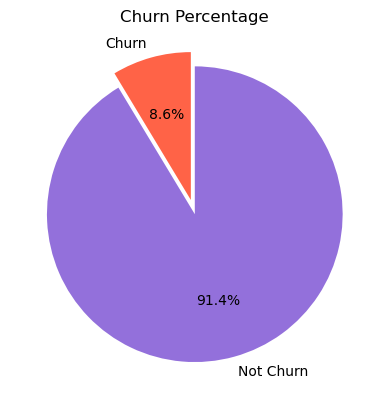

In [41]:
# Calculate churn percentage
churn_percentage = telecom_data['churn'].mean() * 100

# Create a pie chart
labels = ['Churn', 'Not Churn']
sizes = [churn_percentage, 100 - churn_percentage]
colors = ['#FF6347', '#9370DB']
explode = (0.1, 0)  # explode the 1st slice (Churn)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Churn Percentage')
plt.show()


### Analysis:

The Pie-chart illustrates a low churn rate of 8.6%, with a majority (91.4%) not churning.

In [42]:
telecom_data['mobile_number'] = telecom_data['mobile_number'].astype(object)
telecom_data['churn'] = telecom_data['churn'].astype(object)

In [43]:
# List only the numeric columns
numeric_cols = telecom_data.select_dtypes(exclude=['object']).columns
print(len(numeric_cols))
numeric_cols

83


Index(['act_ph_total_arpu', 'act_ph_onnet_use', 'act_ph_offnet_use',
       'act_ph_roam_ic_use', 'act_ph_roam_og_use', 'act_ph_loc_og_t2t_mou',
       'act_ph_loc_og_t2m_mou', 'act_ph_loc_og_t2f_mou',
       'act_ph_loc_og_t2c_mou', 'act_ph_loc_og_mou', 'act_ph_std_og_t2t_mou',
       'act_ph_std_og_t2m_mou', 'act_ph_std_og_t2f_mou', 'act_ph_std_og_mou',
       'act_ph_isd_og_mou', 'act_ph_spl_og_mou', 'act_ph_og_others',
       'act_ph_total_og_mou', 'act_ph_loc_ic_t2t_mou', 'act_ph_loc_ic_t2m_mou',
       'act_ph_loc_ic_t2f_mou', 'act_ph_loc_ic_mou', 'act_ph_std_ic_t2t_mou',
       'act_ph_std_ic_t2m_mou', 'act_ph_std_ic_t2f_mou', 'act_ph_std_ic_mou',
       'act_ph_total_ic_mou', 'act_ph_spl_ic_mou', 'act_ph_isd_ic_mou',
       'act_ph_ic_others', 'act_ph_total_rech_num', 'act_ph_total_rech_amt',
       'act_ph_max_rech_amt', 'act_ph_last_day_rch_amt', 'act_ph_vol_2g_mb',
       'act_ph_vol_3g_mb', 'act_ph_monthly_2g', 'act_ph_sachet_2g',
       'act_ph_monthly_3g', 'act_ph_sachet_

In [44]:
telecom_data.describe()

,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,534.857433,276.234168,387.121245,13.683965,22.161948,89.951446,172.998297,6.703844,1.767998,269.662288,177.752086,185.362328,1.847471,364.965911,2.094787,7.107334,0.061039,623.774684,68.064333,158.585128,15.180997,241.840347,15.537177,31.416700,2.767422,49.725160,295.426531,0.028552,12.078346,1.277691,10.225317,613.638799,162.869348,95.653294,69.209105,269.864111,0.114058,0.607611,0.173203,0.140415,1264.064776,129.439626,588.209915,303.316002,425.314457,15.629046,25.947215,96.197173,196.844253,70.254562,16.734040,12.017394,696.664356,78.515195,268.243209,183.164518,7.111628,1.732529,286.482299,210.423798,2.043576,409.316000,2.259218,6.740272,0.373981,697.911136,161.882776,16.220002,248.367364,33.087223,2.964285,52.789596,311.193772,0.042846,11.880753,1.346703,173.537553,104.886392,0.128103,0.543784,0.179518,0.144064,128.243825
std,492.259586,464.078274,472.713823,74.514035,106.174763,234.199466,232.925238,20.186350,7.391162,363.523203,408.865690,415.502769,11.695959,612.938412,44.793443,22.859984,3.320303,685.983313,155.251216,215.264800,43.634171,304.146273,72.382629,105.166905,20.263814,140.699389,360.343153,0.116468,74.899124,12.887962,9.478572,601.821630,172.605809,145.260363,268.494284,859.299266,0.357272,1.844444,0.582932,0.974727,975.263117,390.478591,409.006147,436.352420,439.359704,67.364448,94.730406,229.028299,3

### Outliers Treatment

In [45]:
# Removing outliers below th and above 90th percentile
for col in numeric_cols: 
    q1 = telecom_data[col].quantile(0.25)
    q3 = telecom_data[col].quantile(0.75)
    iqr = q3-q1 
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = telecom_data.loc[(telecom_data[col] > range_low) & (telecom_data[col] < range_high)]

print(data.shape)
data.head()

(23320, 85)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.0,0.0,378.005,58.635,0.0,478.035,40.825,13.37,68.000,0.09,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.0,0.0,99.205,2.270,0.0,129.395,154.150,0.00,420.355,0.00,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.0,0.0,209.640,2.240,0.0,265.775,43.750,0.00,48.990,0.00,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.0,0.0,29.270,0.000,0.0,48.770,0.775,0.00,574.635,0.00,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,15.0,0.0,0.0,0.0,0.0,0.00
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.0,0,0,0,0,720,0.00,0,556.1030,117.260,827.305,0.000,0.000,5.320,111.935,6.335,10.020,24.0,640.0,0.0,0.0,89.870,0.375,0.0,95.565,737.050,0.00,848.990,0.00,0.00,0.000,944.565,96.430,3.725,106.505,52.960,0.000,62.985,169.490,0.000,0.000,0.000,50.0,25.0,0.0,0.0,0

#### Deriving new features for performing EDA

In [46]:
data.columns

Index(['mobile_number', 'act_ph_total_arpu', 'act_ph_onnet_use',
       'act_ph_offnet_use', 'act_ph_roam_ic_use', 'act_ph_roam_og_use',
       'act_ph_loc_og_t2t_mou', 'act_ph_loc_og_t2m_mou',
       'act_ph_loc_og_t2f_mou', 'act_ph_loc_og_t2c_mou', 'act_ph_loc_og_mou',
       'act_ph_std_og_t2t_mou', 'act_ph_std_og_t2m_mou',
       'act_ph_std_og_t2f_mou', 'act_ph_std_og_mou', 'act_ph_isd_og_mou',
       'act_ph_spl_og_mou', 'act_ph_og_others', 'act_ph_total_og_mou',
       'act_ph_loc_ic_t2t_mou', 'act_ph_loc_ic_t2m_mou',
       'act_ph_loc_ic_t2f_mou', 'act_ph_loc_ic_mou', 'act_ph_std_ic_t2t_mou',
       'act_ph_std_ic_t2m_mou', 'act_ph_std_ic_t2f_mou', 'act_ph_std_ic_mou',
       'act_ph_total_ic_mou', 'act_ph_spl_ic_mou', 'act_ph_isd_ic_mou',
       'act_ph_ic_others', 'act_ph_total_rech_num', 'act_ph_total_rech_amt',
       'act_ph_max_rech_amt', 'act_ph_last_day_rch_amt', 'act_ph_vol_2g_mb',
       'act_ph_vol_3g_mb', 'act_ph_monthly_2g', 'act_ph_sachet_2g',
       'act_ph_mont

In [47]:

selected_columns = [column for column in data.columns if all(substring in column for substring in ['mou','total'])]
selected_columns

['act_ph_total_og_mou',
 'act_ph_total_ic_mou',
 'gd_ph_total_og_mou',
 'gd_ph_total_ic_mou']

##### Identifying whether there is descrease in Minutes if Usage on Total MOU

In [48]:
# Total mou at good phase incoming and outgoing
data['gd_ph_total_mou'] = (data['gd_ph_total_og_mou'] + data['gd_ph_total_og_mou'])
data['act_ph_total_mou'] = (data['act_ph_total_og_mou'] + data['act_ph_total_ic_mou'])
data['diff_total_mou'] = (data['act_ph_total_mou'] - data['gd_ph_total_mou'])
# Checking whether the mou has decreased in action phase
data['decrease_mou_yes_no'] = np.where((data['diff_total_mou'] < 0), 1, 0)
print(data.shape)
data.head(10)

(23320, 89)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.000,0.0,378.005,58.635,0.000,478.035,40.825,13.370,68.000,0.090,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.000,0.0,99.205,2.270,0.000,129.395,154.150,0.000,420.355,0.000,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.000,0.0,209.640,2.240,0.000,265.775,43.750,0.000,48.990,0.000,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.000,0.0,29.270,0.000,0.000,48.770,0.775,0.000,574.635,0.000,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,15.0,0.0,0.0,0.0,0.0,0.00,1250.34,0.00,-1250.34,1
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.0,0,0,0,0,720,0.00,0,556.1030,117.260,827.305,0.000,0.000,5.320,111.

In [49]:
selected_columns = [column for column in data.columns if all(substring in column for substring in ['rech'])]
selected_columns

['act_ph_total_rech_num',
 'act_ph_total_rech_amt',
 'act_ph_max_rech_amt',
 'gd_ph_total_rech_num',
 'gd_ph_total_rech_amt',
 'gd_ph_max_rech_amt']

##### Identifying whether there is descrease in total recharge amount in action phase

In [50]:

data['diff_rech_amt'] = (data['act_ph_total_rech_amt'] - data['gd_ph_total_rech_amt'])
# Checking whether the amt has decreased in action phase
data['decrease_amt_yes_no'] = np.where((data['diff_rech_amt'] < 0), 1, 0)
print(data.shape)
data.head(10)

(23320, 91)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no,diff_rech_amt,decrease_amt_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.000,0.0,378.005,58.635,0.000,478.035,40.825,13.370,68.000,0.090,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1,2453.0,0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.000,0.0,99.205,2.270,0.000,129.395,154.150,0.000,420.355,0.000,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0,337.0,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.000,0.0,209.640,2.240,0.000,265.775,43.750,0.000,48.990,0.000,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1,-299.0,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.000,0.0,29.270,0.000,0.000,48.770,0.775,0.000,574.635,0.000,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,15.0,0.0,0.0,0.0,0.0,0.00,1250.34,0.00,-1250.34,1,-378.0,1
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0

##### Identifying whether there is decrease in revenue per user in action phase

In [51]:
selected_columns = [column for column in data.columns if all(substring in column for substring in ['arpu'])]
selected_columns

['act_ph_total_arpu', 'gd_ph_total_arpu']

In [52]:
data['diff_arpu'] = (data['act_ph_total_arpu'] - data['gd_ph_total_arpu'])
# Checking whether the amt has decreased in action phase
data['decrease_arpu_yes_no'] = np.where((data['diff_arpu'] < 0), 1, 0)
print(data.shape)
data.head(10)

(23320, 93)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no,diff_rech_amt,decrease_amt_yes_no,diff_arpu,decrease_arpu_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.000,0.0,378.005,58.635,0.000,478.035,40.825,13.370,68.000,0.090,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1,2453.0,0,1961.9650,0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.000,0.0,99.205,2.270,0.000,129.395,154.150,0.000,420.355,0.000,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0,337.0,0,244.0015,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.000,0.0,209.640,2.240,0.000,265.775,43.750,0.000,48.990,0.000,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1,-299.0,1,-177.5280,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.000,0.0,29.270,0.000,0.000,48.770,0.775,0.000,574.635,0.000,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,15.0,0.0,0.0,0.0,0.0,0.00,1250.34,0.00,-1250.34,1,-378.0,1,-328.9950,1
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16

##### Identifying whether there is decrease in local minutes of usage per user in action phase

In [53]:
selected_columns = [column for column in data.columns if all(substring in column for substring in ['loc'])]
selected_columns

['act_ph_loc_og_t2t_mou',
 'act_ph_loc_og_t2m_mou',
 'act_ph_loc_og_t2f_mou',
 'act_ph_loc_og_t2c_mou',
 'act_ph_loc_og_mou',
 'act_ph_loc_ic_t2t_mou',
 'act_ph_loc_ic_t2m_mou',
 'act_ph_loc_ic_t2f_mou',
 'act_ph_loc_ic_mou',
 'gd_ph_loc_og_t2t_mou',
 'gd_ph_loc_ic_t2t_mou',
 'gd_ph_loc_og_t2m_mou',
 'gd_ph_loc_og_t2f_mou',
 'gd_ph_loc_og_t2c_mou',
 'gd_ph_loc_og_mou',
 'gd_ph_loc_ic_t2m_mou',
 'gd_ph_loc_ic_t2f_mou',
 'gd_ph_loc_ic_mou']

In [54]:
data['total_gp_loc_mou'] = data[['gd_ph_loc_og_t2t_mou',
 'gd_ph_loc_ic_t2t_mou',
 'gd_ph_loc_og_t2m_mou',
 'gd_ph_loc_og_t2f_mou',
 'gd_ph_loc_og_t2c_mou',
 'gd_ph_loc_og_mou',
 'gd_ph_loc_ic_t2m_mou',
 'gd_ph_loc_ic_t2f_mou',
 'gd_ph_loc_ic_mou']].sum(axis=1)
data['total_act_loc_mou'] = data[['act_ph_loc_og_t2t_mou',
 'act_ph_loc_og_t2m_mou',
 'act_ph_loc_og_t2f_mou',
 'act_ph_loc_og_t2c_mou',
 'act_ph_loc_og_mou',
 'act_ph_loc_ic_t2t_mou',
 'act_ph_loc_ic_t2m_mou',
 'act_ph_loc_ic_t2f_mou',
 'act_ph_loc_ic_mou']].sum(axis=1)
data['diff_loc_mou'] = data['total_act_loc_mou']- data['total_gp_loc_mou']

data['decrease_loc_mou_yes_no'] = np.where((data['diff_loc_mou'] < 0), 1, 0)
print(data.shape)
data.head(10)

(23320, 97)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no,diff_rech_amt,decrease_amt_yes_no,diff_arpu,decrease_arpu_yes_no,total_gp_loc_mou,total_act_loc_mou,diff_loc_mou,decrease_loc_mou_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.000,0.0,378.005,58.635,0.000,478.035,40.825,13.370,68.000,0.090,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1,2453.0,0,1961.9650,0,1739.150,887.65,-851.500,1
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.000,0.0,99.205,2.270,0.000,129.395,154.150,0.000,420.355,0.000,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0,337.0,0,244.0015,0,500.465,1218.97,718.505,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.000,0.0,209.640,2.240,0.000,265.775,43.750,0.000,48.990,0.000,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1,-299.0,1,-177.5280,1,1038.215,835.39,-202.825,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.000,0.0,29.270,0.000,0.000,48.770,0.775,0.000,574.635,0.000,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,15.0,0.0,0.0,0.0,0.0,0.00,1250.34,0.00,-1250.34,1,-37

##### Identifying whether there is decrease in STD minutes of usage per user in action phase

In [55]:
selected_columns = [column for column in data.columns if all(substring in column for substring in ['std'])]
selected_columns

['act_ph_std_og_t2t_mou',
 'act_ph_std_og_t2m_mou',
 'act_ph_std_og_t2f_mou',
 'act_ph_std_og_mou',
 'act_ph_std_ic_t2t_mou',
 'act_ph_std_ic_t2m_mou',
 'act_ph_std_ic_t2f_mou',
 'act_ph_std_ic_mou',
 'gd_ph_std_og_t2t_mou',
 'gd_ph_std_ic_t2t_mou',
 'gd_ph_std_og_t2m_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_std_og_mou',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_std_ic_t2f_mou',
 'gd_ph_std_ic_mou']

In [56]:
data['total_gp_std_mou'] = data[['gd_ph_std_ic_t2t_mou',
 'gd_ph_std_og_t2m_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_std_og_mou',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_std_ic_t2f_mou',
 'gd_ph_std_ic_mou']].sum(axis=1)
data['total_act_std_mou'] = data[['act_ph_std_og_t2t_mou',
 'act_ph_std_og_t2m_mou',
 'act_ph_std_og_t2f_mou',
 'act_ph_std_og_mou',
 'act_ph_std_ic_t2t_mou',
 'act_ph_std_ic_t2m_mou',
 'act_ph_std_ic_t2f_mou',
 'act_ph_std_ic_mou']].sum(axis=1)
data['diff_std_mou'] = data['total_act_std_mou']- data['total_gp_std_mou']

data['decrease_std_mou_yes_no'] = np.where((data['diff_std_mou'] < 0), 1, 0)
print(data.shape)
data.head(10)

(23320, 101)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no,diff_rech_amt,decrease_amt_yes_no,diff_arpu,decrease_arpu_yes_no,total_gp_loc_mou,total_act_loc_mou,diff_loc_mou,decrease_loc_mou_yes_no,total_gp_std_mou,total_act_std_mou,diff_std_mou,decrease_std_mou_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.000,0.0,378.005,58.635,0.000,478.035,40.825,13.370,68.000,0.090,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1,2453.0,0,1961.9650,0,1739.150,887.65,-851.500,1,475.795,543.54,67.745,0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.000,0.0,99.205,2.270,0.000,129.395,154.150,0.000,420.355,0.000,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0,337.0,0,244.0015,0,500.465,1218.97,718.505,0,1066.400,2259.16,1192.760,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.000,0.0,209.640,2.240,0.000,265.775,43.750,0.000,48.990,0.000,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1,-299.0,1,-177.5280,1,1038.215,835.39,-202.825,1,332.450,207.93,-124.520,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.000,0.0,29.270,0.000,0.000,48.770,0.775,0.000,574.

##### Identifying whether there is decrease in Violume based consumption per user in action phase

In [57]:
selected_columns = [column for column in telecom_data.columns if all(substring in column for substring in ['vbc'])]
selected_columns

['act_ph_vbc_3g', 'gd_ph_vbc_3g']

In [58]:
data['diff_vbg_3g'] = data['act_ph_vbc_3g']- data['gd_ph_vbc_3g']

data['decrease_vbc_3g_yes_no'] = np.where((data['diff_vbg_3g'] < 0), 1, 0)
print(data.shape)
data.head(10)

(23320, 103)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no,diff_rech_amt,decrease_amt_yes_no,diff_arpu,decrease_arpu_yes_no,total_gp_loc_mou,total_act_loc_mou,diff_loc_mou,decrease_loc_mou_yes_no,total_gp_std_mou,total_act_std_mou,diff_std_mou,decrease_std_mou_yes_no,diff_vbg_3g,decrease_vbc_3g_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.000,0.0,378.005,58.635,0.000,478.035,40.825,13.370,68.000,0.090,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1,2453.0,0,1961.9650,0,1739.150,887.65,-851.500,1,475.795,543.54,67.745,0,38.68,0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.000,0.0,99.205,2.270,0.000,129.395,154.150,0.000,420.355,0.000,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0,337.0,0,244.0015,0,500.465,1218.97,718.505,0,1066.400,2259.16,1192.760,0,0.00,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.000,0.0,209.640,2.240,0.000,265.775,43.750,0.000,48.990,0.000,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1,-299.0,1,-177.5280,1,1038.215,835.39,-202.825,1,332.450,207.93,-124.520,1,-12.17,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5

In [59]:
print(data.shape)
data.head()

(23320, 103)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no,diff_rech_amt,decrease_amt_yes_no,diff_arpu,decrease_arpu_yes_no,total_gp_loc_mou,total_act_loc_mou,diff_loc_mou,decrease_loc_mou_yes_no,total_gp_std_mou,total_act_std_mou,diff_std_mou,decrease_std_mou_yes_no,diff_vbg_3g,decrease_vbc_3g_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.0,0.0,378.005,58.635,0.0,478.035,40.825,13.37,68.000,0.09,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1,2453.0,0,1961.9650,0,1739.150,887.65,-851.500,1,475.795,543.54,67.745,0,38.68,0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.0,0.0,99.205,2.270,0.0,129.395,154.150,0.00,420.355,0.00,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0,337.0,0,244.0015,0,500.465,1218.97,718.505,0,1066.400,2259.16,1192.760,0,0.00,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.0,0.0,209.640,2.240,0.0,265.775,43.750,0.00,48.990,0.00,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1,-299.0,1,-177.5280,1,1038.215,835.39,-202.825,1,332.450,207.93,-124.520,1,-12.17,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.0,0.0,29.

# EDA

## Univariate analysis

In [60]:
decrease_columns = [column for column in data.columns if all(substring in column for substring in ['decrease'])]
decrease_columns

['decrease_mou_yes_no',
 'decrease_amt_yes_no',
 'decrease_arpu_yes_no',
 'decrease_loc_mou_yes_no',
 'decrease_std_mou_yes_no',
 'decrease_vbc_3g_yes_no']

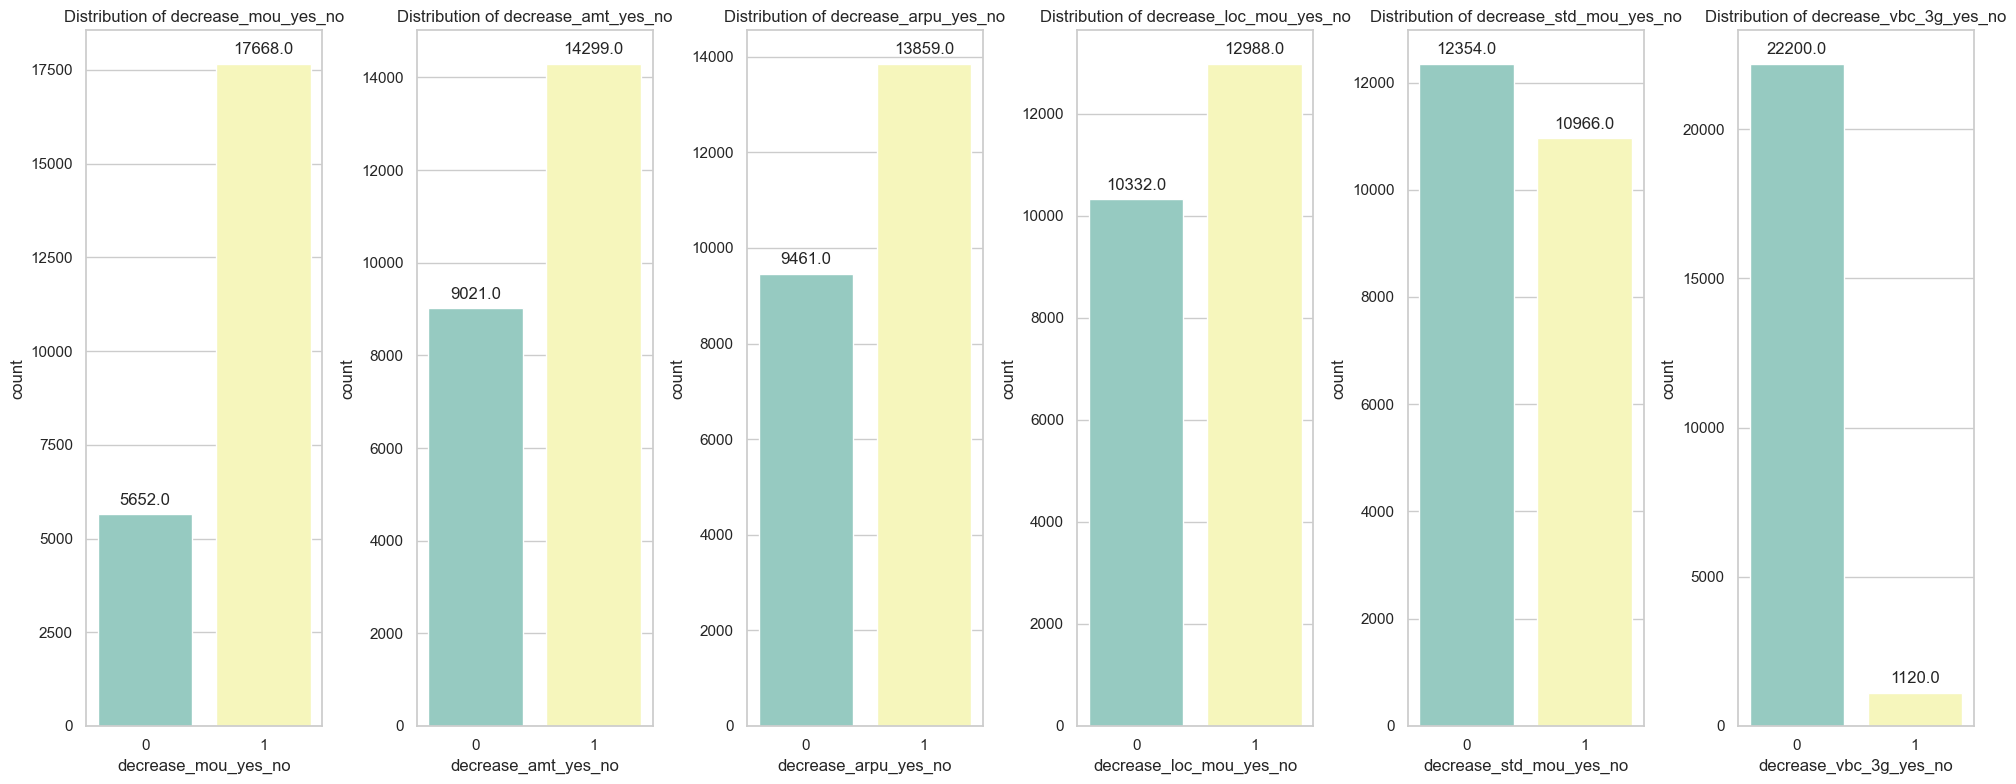

In [61]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create subplots based on the number of decrease_columns
fig, axes = plt.subplots(nrows=1, ncols=len(decrease_columns), figsize=(20, 8))

# Define a new color palette (you can use any seaborn color palette or provide a list of colors)
new_palette = "Set3"

# Iterate through each decrease column and create a count plot
for i, column in enumerate(decrease_columns):
    sns.countplot(x=column, data=data, ax=axes[i], palette=new_palette)
    axes[i].set_title(f'Distribution of {column}')
    
    # Add labels to each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

#### As we can see the distribution in customers have got decrease in minutes of usage in local & STD network as well, recharge amount, revenue per user & volume

Inference

* We can see that the consumers with lower minutes of usage (mou) during the action phase as opposed to the good phase have a higher churn rate.
* Based on whether the customer's number of recharges reduced during the action month, the churn rate


Inference

* The churn rate is higher for consumers whose number of recharges during the action phase is lower than their number during the good phase, as is to be expected.

* Churn rate based on whether a client reduced their quantity of recharge during the current month

Inference

* The same behaviour is seen here as well. Customers who recharge less frequently during the action phase than during the good phase have higher churn rates.

* Based on whether the client reduced their volume-based cost in action month, calculate the churn rate.

Inference 

* This is the anticipated outcome. Customers whose volume-based cost in action month is higher have higher churn rates. This indicates that even when they are in the action phase, customers do not increase their monthly recharge.

Inference 

* The range of average revenue per user (ARPU) for churned customers is primarily 0 to 900. Customers with higher ARPU are less likely to leave the company.

* The range of ARPU for non-churned clients is primarily 0 to 1000.

Inference 

* The churn clients' minutes of usage (MOU) are primarily in the 0 to 2500 range. Less turnover is likely the stronger the MOU.

## Bivariate analysis

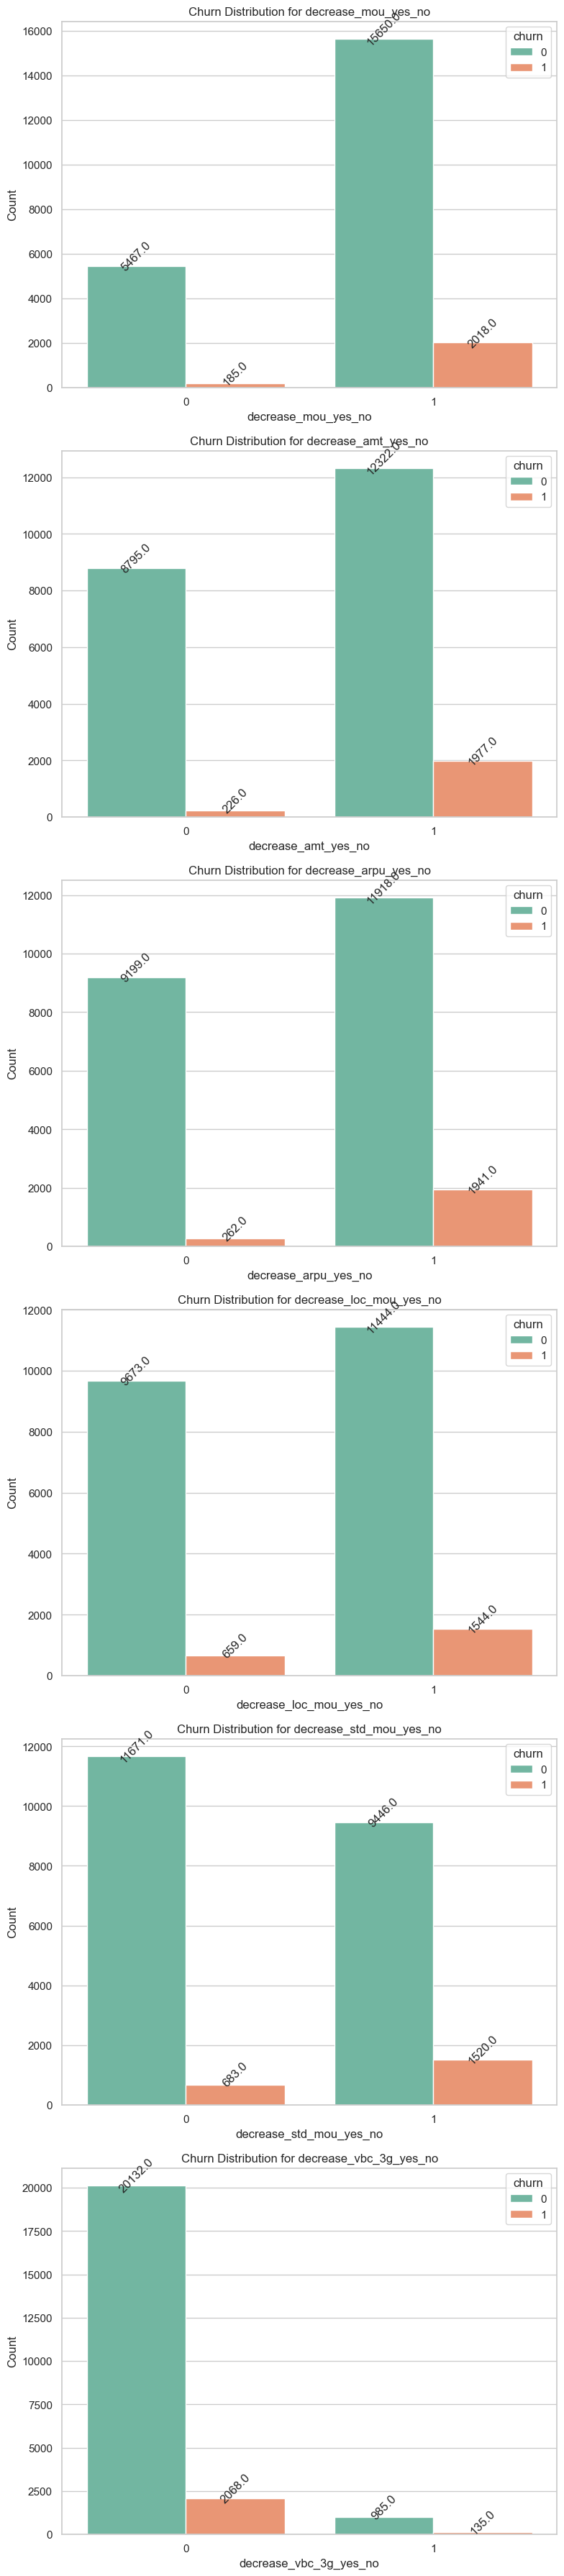

In [62]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create subplots with vertical layout
fig, axes = plt.subplots(len(decrease_columns), 1, figsize=(8, 6 * len(decrease_columns)))

# Define a new color palette (you can use any seaborn color palette or provide a list of colors)
new_palette = "Set2"

# Iterate through each decrease column and create rotated bar plots
for i, column in enumerate(decrease_columns):
    sns.countplot(x=column, hue='churn', data=data, ax=axes[i], palette=new_palette)

    # Add count labels to each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45)

    axes[i].set_title(f'Churn Distribution for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


#### Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase

Inference

* The accompanying graphic demonstrates that consumers with lower recharge amounts and/or fewer recharges in the action phase compared to the good phase have higher churn rates.

#### Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase

Inference 

* We can see that the churn rate is higher in this instance as well for consumers whose recharge amounts are reduced as the volume-based costs rise during the action month.

#### Analysis of recharge amount and number of recharge in action month

Inference

* The aforementioned pattern demonstrates that the relationship between the recharge quantity and number is primarily proportional. The amount of the recharge increases with the number of recharges.

#### Dropping few derived columns, which are not required in further analysis

In [63]:
print(data.shape)
data.head()

(23320, 103)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,diff_total_mou,decrease_mou_yes_no,diff_rech_amt,decrease_amt_yes_no,diff_arpu,decrease_arpu_yes_no,total_gp_loc_mou,total_act_loc_mou,diff_loc_mou,decrease_loc_mou_yes_no,total_gp_std_mou,total_act_std_mou,diff_std_mou,decrease_std_mou_yes_no,diff_vbg_3g,decrease_vbc_3g_yes_no
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.0,0.0,378.005,58.635,0.0,478.035,40.825,13.37,68.000,0.09,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,-317.87,1,2453.0,0,1961.9650,0,1739.150,887.65,-851.500,1,475.795,543.54,67.745,0,38.68,0
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.0,0.0,99.205,2.270,0.0,129.395,154.150,0.00,420.355,0.00,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,1060.29,0,337.0,0,244.0015,0,500.465,1218.97,718.505,0,1066.400,2259.16,1192.760,0,0.00,0
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.0,0.0,209.640,2.240,0.0,265.775,43.750,0.00,48.990,0.00,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,-104.98,1,-299.0,1,-177.5280,1,1038.215,835.39,-202.825,1,332.450,207.93,-124.520,1,-12.17,1
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.0,0.0,29.

In [64]:
select_col = [column for column in data.columns if 'decrease' in column or 'diff' in column]
print(select_col)


['diff_total_mou', 'decrease_mou_yes_no', 'diff_rech_amt', 'decrease_amt_yes_no', 'diff_arpu', 'decrease_arpu_yes_no', 'diff_loc_mou', 'decrease_loc_mou_yes_no', 'diff_std_mou', 'decrease_std_mou_yes_no', 'diff_vbg_3g', 'decrease_vbc_3g_yes_no']


In [65]:

data = data.drop(select_col, axis=1)
print(data.shape)
data.head()

(23320, 91)


,mobile_number,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,churn,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,total_gp_loc_mou,total_act_loc_mou,total_gp_std_mou,total_act_std_mou
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.0,0.0,378.005,58.635,0.0,478.035,40.825,13.37,68.000,0.09,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,1739.150,887.65,475.795,543.54
13,7002191713,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,0,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.0,0.0,99.205,2.270,0.0,129.395,154.150,0.00,420.355,0.00,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,500.465,1218.97,1066.400,2259.16
16,7000875565,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,0,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.0,0.0,209.640,2.240,0.0,265.775,43.750,0.00,48.990,0.00,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,1038.215,835.39,332.450,207.93
17,7000187447,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,0,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.0,0.0,29.270,0.000,0.0,48.770,0.775,0.00,574.635,0.00,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,15.0,0.0,0.0,0.0,0.0,0.00,1250.34,0.00,181.800,0.00,585.320,0.00
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.

In [66]:
# Converting churn column to int
data['churn'] = data['churn'].astype('int64')

## Train-Test Split

In [67]:
# Import library
from sklearn.model_selection import train_test_split

In [68]:
# Putting feature variables into X
X = data.drop(['mobile_number','churn'], axis=1)
print(X.shape)
X.head()

(23320, 89)


,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,total_gp_loc_mou,total_act_loc_mou,total_gp_std_mou,total_act_std_mou
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.00,0.0,0,0,0,0,802,57.74,1209.5150,56.260,510.295,24.860,18.165,41.385,13.795,45.200,24.360,5.0,1185.0,0.0,0.0,378.005,58.635,0.0,478.035,40.825,13.37,68.000,0.09,2.25,0.000,548.385,219.525,126.810,391.555,109.215,43.215,176.810,592.250,0.105,8.295,15.465,1185.0,0.0,0.0,0.0,0.0,0.0,19.06,1096.77,778.90,1739.150,887.65,475.795,543.54
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,353.99,498.23,156.94,0.00,655.18,1.29,4.78,0.0,1015.26,52.58,195.18,7.49,255.26,154.58,317.91,1.91,474.41,1144.53,0.0,393.39,21.44,11,717,130,0,0.02,0.0,0,3,0,0,2607,0.00,349.2585,305.075,266.295,83.885,21.620,27.910,266.195,37.730,76.985,5.0,380.0,0.0,0.0,99.205,2.270,0.0,129.395,154.150,0.00,420.355,0.00,0.00,0.000,549.750,80.705,2.405,120.845,168.960,0.000,245.950,570.595,0.225,153.695,49.860,110.0,80.0,0.0,0.0,0.0,0.0,0.00,1099.50,2159.79,500.465,1218.97,1066.400,2259.16
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,205.93,3.23,18.29,0.00,21.53,0.00,5.91,0.0,233.38,28.89,150.16,32.71,211.78,6.33,73.93,2.18,82.44,294.46,0.0,0.23,0.00,2,160,130,130,0.00,0.0,0,0,0,0,511,0.00,365.4220,62.260,263.015,1.415,8.870,53.885,5.235,56.385,73.715,8.0,459.0,0.0,0.0,209.640,2.240,0.0,265.775,43.750,0.00,48.990,0.00,1.63,0.000,316.410,188.250,8.695,253.345,45.880,0.255,119.860,373.210,0.000,0.000,0.000,110.0,100.0,0.0,0.0,0.0,0.0,12.17,632.82,527.84,1038.215,835.39,332.450,207.93
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.00,0.0,0,0,0,0,667,0.00,354.4940,597.595,30.820,2.380,4.230,19.495,573.860,17.270,4.315,10.5,408.0,0.0,0.0,29.270,0.000,0.0,48.770,0.775,0.00,574.635,0.00,1.29,0.465,625.170,24.860,0.000,42.135,0.640,0.000,4.955,47.095,0.000,0.000,0.000,55.0,15.0,0.0,0.0,0.0,0.0,0.00,1250.34,0.00,181.800,0.00,585.320,0.00
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.00,0.0,0,0,0,0,720,0.00,556.1030,117.260,827.305,0.000,0.000,5.32

In [69]:
# Putting target variable to y
y = data['churn']
print(y.shape)
y.head()

(23320,)


7     1
13    0
16    0
17    0
21    0
Name: churn, dtype: int64

In [70]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18656, 89)
(4664, 89)
(18656,)
(4664,)


### Dealing with data imbalance

In [71]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
sm = SMOTE(random_state=42)

In [72]:
class_counts = y.value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
0    21117
1     2203
Name: churn, dtype: int64


In [73]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [74]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [75]:
# Instantiate the Scaler
scaler = StandardScaler()

In [76]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])
print(X_train.shape)
X_train.head()

(33802, 89)


,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,total_gp_loc_mou,total_act_loc_mou,total_gp_std_mou,total_act_std_mou
0,0.057451,-0.603711,1.281479,-0.244929,-0.270227,-0.351372,-0.534602,-0.312444,-0.243985,-0.572390,-0.465943,1.799428,-0.146338,0.910176,-0.055911,-0.32064,-0.028235,0.636203,-0.413203,-0.383717,-0.311000,-0.507927,-0.224096,-0.291716,-0.114037,-0.348002,-0.435478,-0.244922,-0.16702,-0.092074,-0.248494,0.007618,0.133524,-0.500186,-0.179767,-0.128433,-0.18299,-0.265574,-0.131903,-0.083478,0.342362,-0.113757,-0.650978,-0.772762,0.560052,-0.247716,-0.307728,-0.398878,-0.610565,-0.446014,-0.278559,-0.927509,-0.539395,-0.246271,-0.139571,-0.612681,-0.304837,-0.281136,-0.655180,0.914381,-0.152898,0.244003,-0.076486,-0.419432,-0.357215,-0.063446,-0.487176,-0.319080,-0.590880,-0.377301,-0.143599,-0.446678,-0.688170,-0.396382,-0.190899,-0.094406,-0.186660,0.318236,-0.256541,-0.308383,-0.184161,-0.116213,-0.232611,-0.063446,0.369306,-0.726826,-0.624916,0.461606,0.813916
1,0.701659,-0.483095,3.071037,-0.244929,-0.270227,-0.088009,-0.026500,-0.305488,-0.243985,-0.086433,-0.461690,3.575007,-0.146338,2.123040,-0.055911,-0.32064,-0.028235,1.894573,-0.393727,0.052839,0.208113,-0.127749,-0.169281,-0.288072,-0.093349,-0.312806,-0.104621,-0.244922,-0.16702,-0.092074,-0.136185,0.783296,0.609952,0.718060,-0.179767,-0.128433,-0.18299,-0.265574,-0.131903,-0.083478,-0.170949,-0.113757,0.228022,-0.718108,2.333907,-0.247716,-0.307728,-0.310976,-0.590407,0.087154,-0.266206,-0.632930,0.212364,-0.246271,-0.139571,-0.237273,-0.080316,-0.281136,-0.348293,2.593621,-0.152898,1.490247,-0.076486,-0.419432,-0.357215,1.312829,0.019128,0.376221,0.102544,-0.240821,-0.143599,-0.341659,-0.042303,-0.396382,-0.190899,-0.105955,0.932158,1.014096,-0.256541,0.469834,-0.184161,-0.116213,-0.232611,1.312829,1.535723,-0.167595,-0.121887,1.966176,1.983186
2,0.216911,-0.599073,-0.174975,3.429145,1.837379,-0.351372,-0.668213,-0.312444,-0.243985,-0.656790,-0.465943,-0.472717,-0.146338,-0.638217,-0.055911,-0.32064,-0.028235,-0.724631,-0.416180,-0.679774,-0.316680,-0.715326,-0.224096,-0.332083,-0.114037,-0.377129,-0.619381,-0.244922,-0.16702,-0.092074,-0.473112,-0.254688,0.609952,0.227378,0.858796,-0.127882,4.55679,-0.265574,-0.131903,-0.083478,0.052831,-0.113757,0.972985,-0.680567,0.299507,5.515127,4.786477,-0.398878,-0.515831,-0.446014,0.360672,-0.691846,0.631976,0.312458,-0.139571,-0.729105,0.037040,-0.281136,-0.714609,-0.614037,0.539689,-0.

In [77]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
print(X_test.shape)
X_test.head()

(4664, 89)


,act_ph_total_arpu,act_ph_onnet_use,act_ph_offnet_use,act_ph_roam_ic_use,act_ph_roam_og_use,act_ph_loc_og_t2t_mou,act_ph_loc_og_t2m_mou,act_ph_loc_og_t2f_mou,act_ph_loc_og_t2c_mou,act_ph_loc_og_mou,act_ph_std_og_t2t_mou,act_ph_std_og_t2m_mou,act_ph_std_og_t2f_mou,act_ph_std_og_mou,act_ph_isd_og_mou,act_ph_spl_og_mou,act_ph_og_others,act_ph_total_og_mou,act_ph_loc_ic_t2t_mou,act_ph_loc_ic_t2m_mou,act_ph_loc_ic_t2f_mou,act_ph_loc_ic_mou,act_ph_std_ic_t2t_mou,act_ph_std_ic_t2m_mou,act_ph_std_ic_t2f_mou,act_ph_std_ic_mou,act_ph_total_ic_mou,act_ph_spl_ic_mou,act_ph_isd_ic_mou,act_ph_ic_others,act_ph_total_rech_num,act_ph_total_rech_amt,act_ph_max_rech_amt,act_ph_last_day_rch_amt,act_ph_vol_2g_mb,act_ph_vol_3g_mb,act_ph_monthly_2g,act_ph_sachet_2g,act_ph_monthly_3g,act_ph_sachet_3g,aon,act_ph_vbc_3g,gd_ph_total_arpu,gd_ph_onnet_use,gd_ph_offnet_use,gd_ph_roam_ic_use,gd_ph_roam_og_use,gd_ph_loc_og_t2t_mou,gd_ph_std_og_t2t_mou,gd_ph_loc_ic_t2t_mou,gd_ph_std_ic_t2t_mou,gd_ph_total_rech_num,gd_ph_total_rech_amt,gd_ph_vol_2g_mb,gd_ph_vol_3g_mb,gd_ph_loc_og_t2m_mou,gd_ph_loc_og_t2f_mou,gd_ph_loc_og_t2c_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2m_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_isd_og_mou,gd_ph_spl_og_mou,gd_ph_og_others,gd_ph_total_og_mou,gd_ph_loc_ic_t2m_mou,gd_ph_loc_ic_t2f_mou,gd_ph_loc_ic_mou,gd_ph_std_ic_t2m_mou,gd_ph_std_ic_t2f_mou,gd_ph_std_ic_mou,gd_ph_total_ic_mou,gd_ph_spl_ic_mou,gd_ph_isd_ic_mou,gd_ph_ic_others,gd_ph_max_rech_amt,gd_ph_last_day_rch_amt,gd_ph_monthly_2g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_sachet_3g,gd_ph_vbc_3g,gd_ph_total_mou,act_ph_total_mou,total_gp_loc_mou,total_act_loc_mou,total_gp_std_mou,total_act_std_mou
88549,0.414533,-0.580382,0.432497,-0.244929,-0.270227,-0.298784,-0.461593,-0.188621,-0.243985,-0.487423,-0.465943,0.795107,-0.146338,0.225764,-0.042186,-0.320640,-0.028235,0.091280,-0.315059,-0.584813,-0.287332,-0.596345,-0.224096,-0.270272,-0.114037,-0.332528,-0.504303,-0.244922,-0.167020,-0.092074,1.211524,0.416067,-0.410966,-0.246384,-0.179767,-0.128433,-0.18299,-0.265574,-0.131903,-0.083478,0.734555,-0.113757,0.218153,-0.754565,0.416674,-0.247716,-0.307728,-0.345359,-0.614214,-0.402648,-0.267082,1.016710,0.166971,-0.246271,-0.139571,-0.537880,-0.134777,-0.281136,-0.566093,0.728284,-0.152898,0.104907,-0.076486,-0.419432,-0.357215,-0.158279,-0.613307,-0.324354,-0.656797,-0.382019,-0.143599,-0.443583,-0.745476,-0.396382,-0.190899,-0.105955,-0.475388,-0.725554,-0.256541,-0.308383,-0.184161,-0.116213,-0.232611,-0.158279,-0.108574,-0.705352,-0.616191,0.297077,0.160097
48148,0.156110,0.374704,-0.524624,-0.244929,-0.270227,-0.237824,-0.600219,-0.312444,-0.243985,-0.542812,0.576534,-0.215280,-0.146338,0.239332,-0.055911,-0.320640,-0.028235,0.076928,0.200323,-0.467681,-0.296799,-0.265449,-0.080587,-0.272094,-0.114037,-0.257485,-0.201086,-0.244922,-0.167020,-0.092074,1.211524,0.161255,0.269646,-0.246384,2.114283,-0.128433,-0.18299,1.231703,-0.131903,4.723562,-0.733862,-0.113757,-0.344446,0.682901,-0.661723,-0.247716,-0.307728,-0.289027,0.879547,0.255328,0.535812,0.368637,-0.435322,-0.246271,-0.139571,-0.694373,-0.303080,-0.281136,-0.640213,-0.322208,-0.152898,0.373062,-0.076486,-0.417097,-0.357215,0.071137,-0.634489,-0.328387,-0.351375,1.443506,-0.143599,1.317954,0.134367,-0.396382,-0.190899,-0.101938,-0.186660,-0.725554,-0.256541,-0.308383,-0.184161,-0.116213,-0.232611,0.071137,-0.009621,-0.591141,-0.482156,0.331540,0.185832
79820,0.003988,-0.509641,-0.105647,-0.244929,-0.270227,-0.139316,0.494430,-0.254706,-0.243985,0.213017,-0.465943,-0.287198,-0.146338,-0.511791,-0.055911,-0.192465,-0.028235,-0.214234,-0.272111,0.564395,-0.093256,0.246424,-0.224096,-0.272795,0.043317,-0.308963,0.210471,-0.244922,-0.167020,-0.092074,1.099215,0.033849,-0.547088,-0.246384,-0.179767,-0.128433,-0.18299,-0.265574,-0.131903,-0.083478,0.258156,-0.113757,-0.315620,-0.710175,-0.177629,-0.247716,-0.307728,-0.233458,-0.615146,-0.259340,-0.261212,1.252373,-0.364464,-0.246271,-0.139571,0.678456,0.048635,-0.281136,0.296612,-

## Model with Principal component analysis

In [78]:
#Import PCA
from sklearn.decomposition import PCA

In [79]:
# Instantiate PCA
pca = PCA(random_state=42)
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [80]:
# Principal components
pca.components_

array([[ 1.79235059e-01,  1.11234719e-01,  1.58494544e-01, ...,
         2.48594864e-01,  2.27914815e-02,  9.89220112e-02],
       [ 1.08910087e-01,  1.55334173e-01,  1.32981725e-01, ...,
        -1.16130156e-01,  2.63326236e-01,  2.50268230e-01],
       [ 2.42257050e-01, -2.18399817e-02,  3.27158082e-02, ...,
        -7.94732326e-02, -8.01292115e-02, -8.20871905e-03],
       ...,
       [ 0.00000000e+00, -4.06347426e-15, -4.25934946e-15, ...,
         5.54699738e-02, -4.52427485e-01, -5.97800190e-01],
       [ 0.00000000e+00,  7.38024000e-16,  4.90419967e-16, ...,
         5.15937311e-03, -5.09027821e-01,  8.81883564e-02],
       [-0.00000000e+00,  3.95923669e-15,  3.33358687e-15, ...,
         1.88405027e-02,  3.02848658e-01, -4.99678864e-01]])

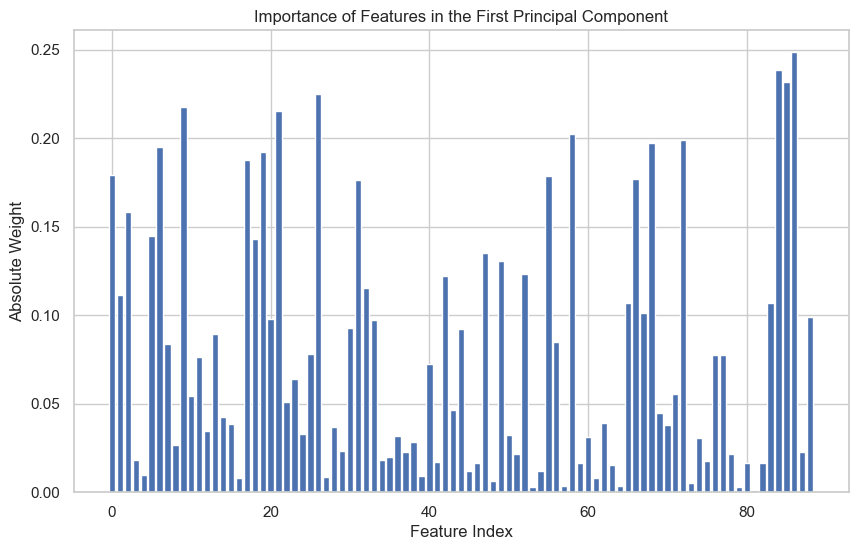

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the first principal component
first_pc = pca.components_[0, :]

# Plot the importance of features in the first principal component
plt.figure(figsize=(10, 6))
plt.bar(range(len(first_pc)), np.abs(first_pc))
plt.xlabel('Feature Index')
plt.ylabel('Absolute Weight')
plt.title('Importance of Features in the First Principal Component')
plt.show()

In [82]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.12435139 0.23024154 0.28601752 0.3321299  0.37362475 0.4106922
 0.44576329 0.47635757 0.50456473 0.53159194 0.55736766 0.58217627
 0.60411381 0.62551497 0.6455624  0.6632302  0.67964136 0.69496943
 0.7093802  0.72342689 0.73719171 0.75039826 0.76291974 0.77511667
 0.78711054 0.79873012 0.81028417 0.82083284 0.83060826 0.84006394
 0.84900098 0.8577929  0.86642543 0.87483237 0.88302571 0.89079138
 0.8980074  0.90508296 0.91208212 0.91851742 0.92474874 0.93040172
 0.93542778 0.94005788 0.94464763 0.94904802 0.95318183 0.95710951
 0.9609237  0.96458895 0.96781608 0.97079812 0.97360278 0.97637596
 0.97904116 0.98150963 0.98395231 0.98619387 0.98841239 0.99049145
 0.99252707 0.99434992 0.99600934 0.99756351 0.99856687 0.99914739
 0.99944035 0.99967312 0.99986842 0.99996752 0.99999753 0.99999933
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


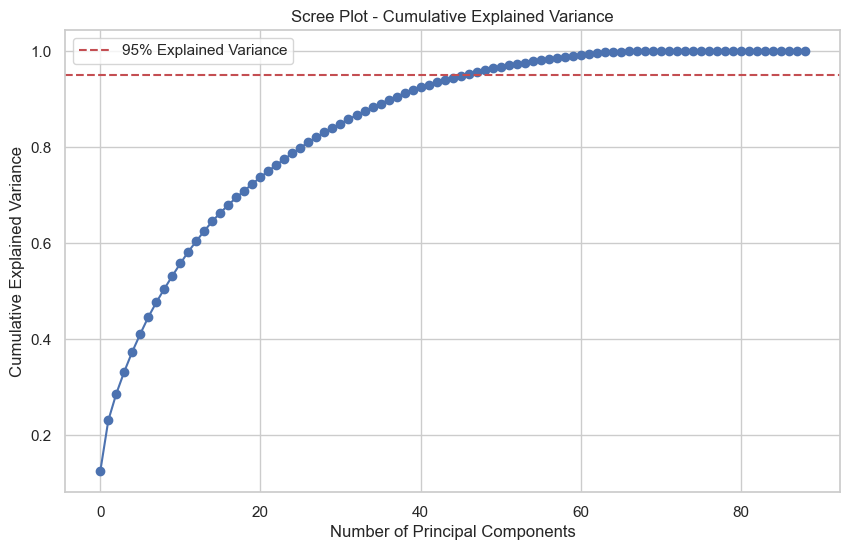

In [83]:
import matplotlib.pyplot as plt

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(variance_cumu, marker='o', linestyle='-', color='b')

# Highlight the point where cumulative variance is 95%
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')

# Add labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Cumulative Explained Variance')

# Show legend
plt.legend()

# Show the plot
plt.show()

## Inference 

46 Principal components represents the point where you have 95% of the total variance explained.

### Performing PCA with 46 components

In [84]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [85]:
# Instantiate PCA with 46 components
pca_final = IncrementalPCA(n_components=46)
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(33802, 46)
(4664, 46)


### Logistic regression with PCA

In [86]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [87]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics

In [88]:
from sklearn.linear_model import LogisticRegression
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

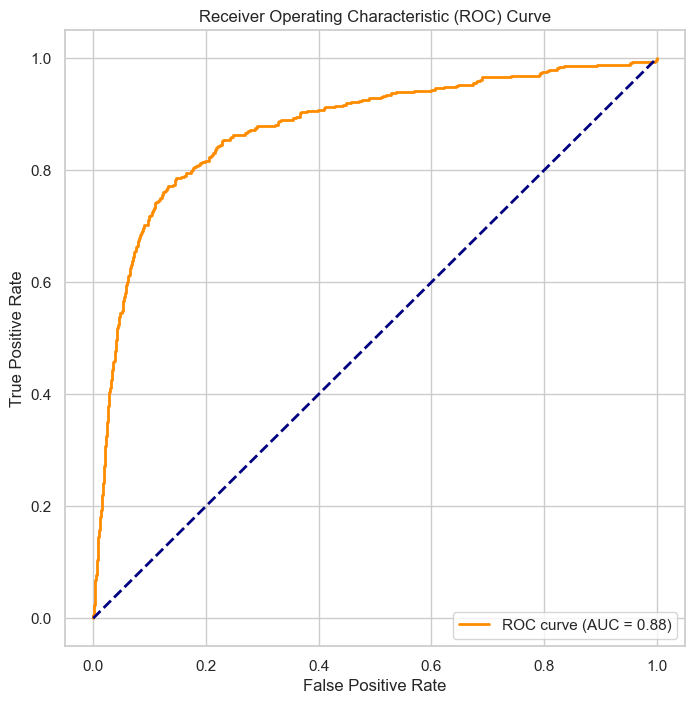

Confusion Matrix:
[[3403  813]
 [  84  364]]
Accuracy: 0.8077
Precision: 0.3093
Recall: 0.8125
F1-Score: 0.4480


In [89]:
# Plot ROC curve
y_prob = model_cv.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display performance metrics
y_pred = model_cv.predict(X_test_pca)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Sensitivity: 0.8125
Specificity: 0.8072
Accuracy: 0.8077


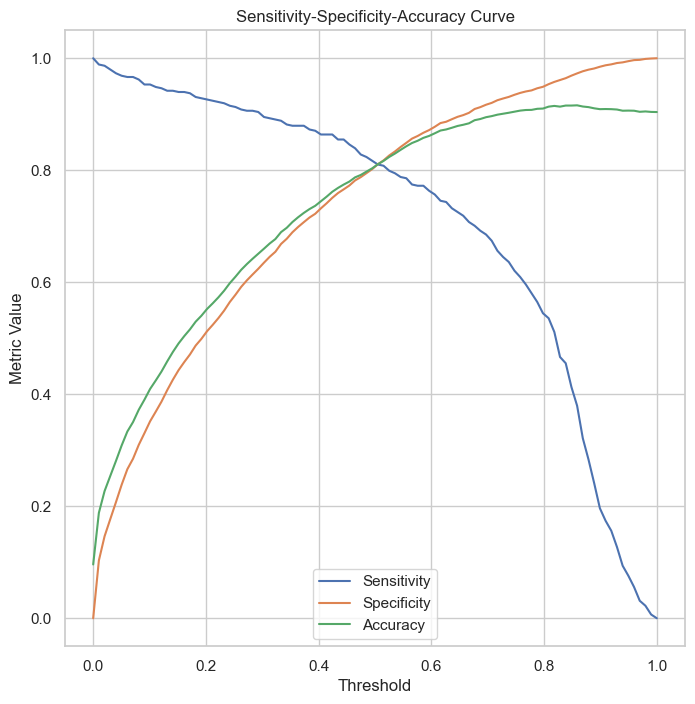

In [90]:
# Calculate Sensitivity, Specificity, and Accuracy
def calculate_metrics(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
    return sensitivity, specificity, accuracy

# Make predictions on the test set
y_pred = model_cv.predict(X_test_pca)

# Calculate Sensitivity, Specificity, and Accuracy
sensitivity, specificity, accuracy = calculate_metrics(y_test, y_pred)

print(f'Sensitivity: {sensitivity:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Plot Sensitivity-Specificity Curve
thresholds = np.linspace(0, 1, 100)
sensitivity_values = []
specificity_values = []
accuracy_values = []

for threshold in thresholds:
    y_prob = model_cv.predict_proba(X_test_pca)[:, 1]
    y_pred_threshold = (y_prob > threshold).astype(int)
    sensitivity, specificity, accuracy = calculate_metrics(y_test, y_pred_threshold)
    sensitivity_values.append(sensitivity)
    specificity_values.append(specificity)
    accuracy_values.append(accuracy)

plt.figure(figsize=(8, 8))
plt.plot(thresholds, sensitivity_values, label='Sensitivity')
plt.plot(thresholds, specificity_values, label='Specificity')
plt.plot(thresholds, accuracy_values, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Sensitivity-Specificity-Accuracy Curve')
plt.legend()
plt.show()

In [91]:
# Cross-validation scores for training data
cv_scores_train = cross_val_score(model_cv, X_train_pca, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Train):", cv_scores_train)
print("Mean Cross-Validation Score (Train):", cv_scores_train.mean())

# Cross-validation scores for test data
cv_scores_test = cross_val_score(model_cv, X_test_pca, y_test, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Test):", cv_scores_test)
print("Mean Cross-Validation Score (Test):", cv_scores_test.mean())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Cross-Validation Scores (Train): [0.82058867 0.82768821 0.82914201 0.82721893 0.82307692]
Mean Cross-Validation Score (Train): 0.8255429503881031
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Cross-Validation Scores (Test): [0.9153269  0.90246517 0.92282958 0.91639871 0.9195279 ]
Mean Cross-Validation Score (Test): 0.9153096522823141


In [92]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096184,0.012109,0.007099,0.001400,0.01,{'C': 0.01},0.841138,0.838311,0.837642,0.836711,0.841855,0.839131,0.002010,1,0.838841,0.839909,0.840021,0.839508,0.839699,0.839595,0.000416
1,0.099918,0.014342,0.005930,0.001347,0.1,{'C': 0.1},0.841138,0.838009,0.837932,0.835536,0.839774,0.838478,0.001894,2,0.838249,0.839688,0.838906,0.839730,0.839699,0.839254,0.000590
2,0.109677,0.008504,0.006301,0.001443,1,{'C': 1},0.841138,0.837707,0.837932,0.835536,0.839774,0.838418,0.001912,6,0.838176,0.839835,0.838981,0.839582,0.839772,0.839269,0.000625
3,0.105670,0.007507,0.007088,0.001743,10,{'C': 10},0.841138,0.837707,0.837932,0.835536,0.840071,0.838477,0.001958,3,0.838176,0.839909,0.838981,0.839582,0.839772,0.839284,0.000639
4,0.125803,0.018824,0.007444,0.001331,100,{'C': 100},0.841138,0.837707,0.837932,0.835536,0.840071,0.838477,0.001958,3,0.838176,0.839909,0.838981,0.839582,0.839772,0.839284,0.000639
5,0.117132,0.007442,0.006194,0.000863,1000,{'C': 1000},0.841138,0.837707,0.837932,0.835536,0.840071,0.838477,0.001958,3,0.838176,0.839909,0.838981,0.839582,0.839772,0.839284,0.000639


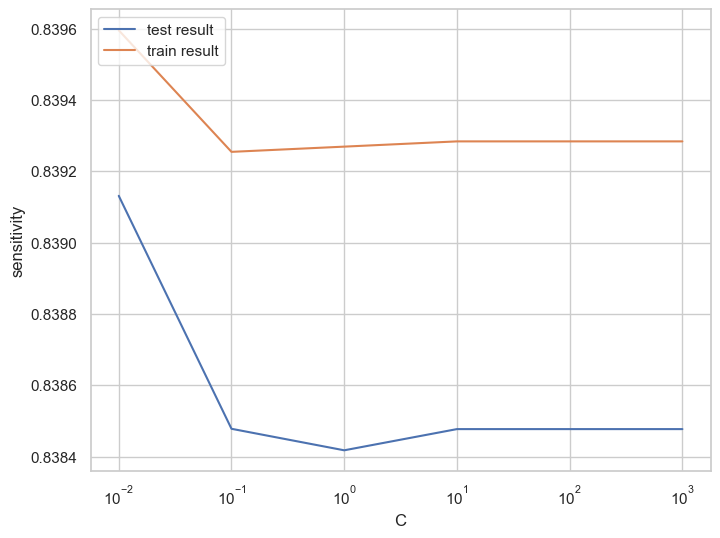

In [93]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [94]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8391312139325899 at C = 0.01


### Decision Tree PCA

In [95]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [96]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [97]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.010802,0.133833,0.005811,0.001629,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.800592,0.788228,0.794379,0.799408,0.806213,0.797764,0.006074,5
1,1.822747,0.088320,0.005475,0.000300,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.800592,0.788228,0.794379,0.799408,0.806213,0.797764,0.006074,5
2,1.650051,0.013985,0.005260,0.001077,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.799704,0.782904,0.792899,0.796450,0.805030,0.795397,0.007413,7
3,1.702042,0.142149,0.005014,0.000308,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.799704,0.782904,0.792899,0.796450,0.805030,0.795397,0.007413,7
4,3.065302,0.207943,0.005672,0.000971,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.818639,0.858917,0.842012,0.832840,0.837870,0.838056,0.013078,2
5,2.950355,0.131934,0.005234,0.000752,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.818639,0.858917,0.842308,0.832840,0.838166,0.838174,0.013095,1
6,2.581087,0.031736,0.005004,0.000289,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.795266,0.828157,0.826331,0.833136,0.826627,0.821904,0.013541,3
7,2.583336,0.083847,0.005443,0.000880,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.795266,0.828157,0.826331,0.833136,0.826627,0.821904,0.013541,3


In [98]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8381740285514774
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [99]:
# Model with optimal hyperparameters
dt_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [100]:
# Predictions on the train set
y_train_pred = dt_model.predict(X_train)

In [101]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[15445  1456]
 [ 1255 15646]]


In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9197976451097568
Sensitivity:- 0.9257440388142714
Specificity:- 0.9138512514052423


In [104]:
# Prediction on the test set
y_test_pred = dt_model.predict(X_test)

In [105]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3794  422]
 [ 123  325]]


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.883147512864494
Sensitivity:- 0.7254464285714286
Specificity:- 0.8999051233396584


Model summary

* Train set

Accuracy = 0.90
Sensitivity = 0.91
Specificity = 0.88

* Test set

Accuracy = 0.86
Sensitivity = 0.70
Specificity = 0.87

In [108]:
# Cross-validation scores for train data
cv_scores_train = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Train):", cv_scores_train)
print("Mean Cross-Validation Score (Train):", cv_scores_train.mean())

# Cross-validation scores for test data
cv_scores_test = cross_val_score(dt_model, X_test, y_test, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Test):", cv_scores_test)
print("Mean Cross-Validation Score (Test):", cv_scores_test.mean())

Cross-Validation Scores (Train): [0.86362964 0.91022038 0.90310651 0.90695266 0.90695266]
Mean Cross-Validation Score (Train): 0.8981723713011187
Cross-Validation Scores (Test): [0.9249732  0.92175777 0.9249732  0.92926045 0.92596567]
Mean Cross-Validation Score (Test): 0.9253860590922265


## Random forest

In [109]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [110]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)

# Train the Random Forest Classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Print the training accuracy and precision
print(f'Train accuracy: {metrics.accuracy_score(y_train, y_train_pred)}')
print(f'Train precision: {metrics.precision_score(y_train, y_train_pred, average="weighted")}')

# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Print the test accuracy and precision
print(f'Test accuracy: {metrics.accuracy_score(y_test, y_test_pred)}')
print(f'Test precision: {metrics.precision_score(y_test, y_test_pred, average="weighted")}')

# Print the confusion matrix for the test set
print('Confusion Matrix for Training Set:')
print(confusion_matrix(y_train, y_train_pred))

# Print the confusion matrix for the test set
print('Confusion Matrix for Test Set:')
print(confusion_matrix(y_test, y_test_pred))

# Print the classification report for the test set
print(metrics.classification_report(y_test, y_test_pred))


# Cross-validation scores
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

cv_scores_test = cross_val_score(rf, X_test, y_test, cv=5, scoring='accuracy')
print("Cross-Validation Scores (Test):", cv_scores_test)
print("Mean Cross-Validation Score (Test):", cv_scores_test.mean())

Train accuracy: 0.9488787645701438
Train precision: 0.9489833918380547
Test accuracy: 0.9093053173241853
Test precision: 0.9290389654563669
Confusion Matrix for Training Set:
[[15908   993]
 [  735 16166]]
Confusion Matrix for Test Set:
[[3903  313]
 [ 110  338]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4216
           1       0.52      0.75      0.62       448

    accuracy                           0.91      4664
   macro avg       0.75      0.84      0.78      4664
weighted avg       0.93      0.91      0.92      4664

Cross-Validation Scores: [0.90119805 0.93285017 0.93180473 0.93032544 0.93461538]
Mean Cross-Validation Score: 0.92615875596989
Cross-Validation Scores (Test): [0.92604502 0.93676313 0.9249732  0.93140407 0.92811159]
Mean Cross-Validation Score (Test): 0.9294594022696641


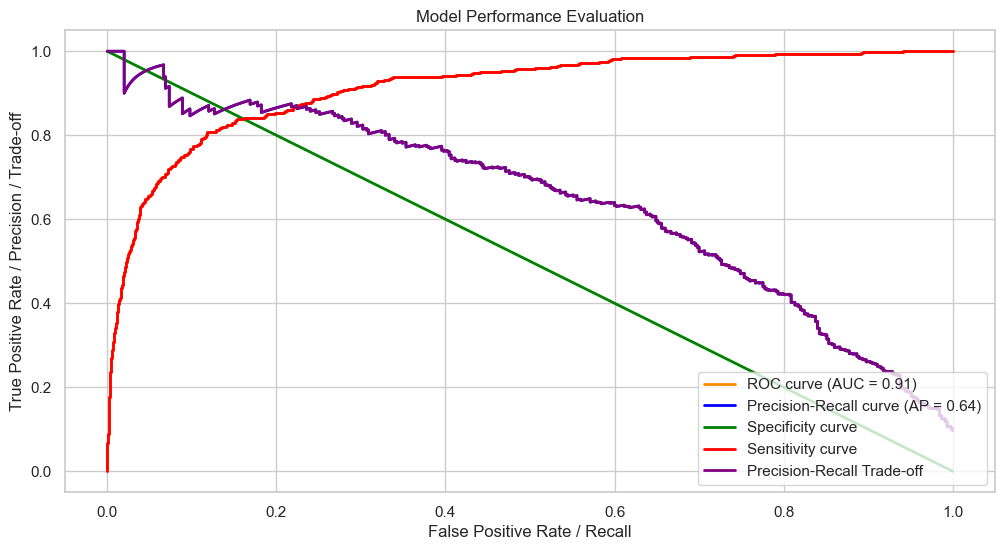

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix

# Assuming you have your data in X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)

# Train the Random Forest Classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_proba = rf.predict_proba(X_test)[:, 1]
y_test_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
average_precision = average_precision_score(y_test, y_test_pred_proba)

# Sensitivity, Specificity, Precision-Recall Trade-off
sensitivity = tpr
specificity = 1 - fpr
precision_recall_tradeoff = precision

# Plotting the curves
plt.figure(figsize=(12, 6))

# ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Precision-Recall curve
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')

# Specificity curve
plt.plot(fpr, specificity, color='green', lw=2, label='Specificity curve')

# Sensitivity curve
plt.plot(fpr, sensitivity, color='red', lw=2, label='Sensitivity curve')

# Precision-Recall Trade-off curve
plt.plot(recall, precision_recall_tradeoff, color='purple', lw=2, label='Precision-Recall Trade-off')

# Set labels and title
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision / Trade-off')
plt.title('Model Performance Evaluation')
plt.legend(loc='lower right')
plt.show()

## Logistic regression with No PCA

In [112]:
# Importing stats model
import statsmodels.api as sm

In [113]:
# Instantiate the model
# Adding the constant to X_train
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
# Fit the model
logm = logm.fit().summary()
logm

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                18656
Model:                            GLM   Df Residuals:                    18572
Model Family:                Binomial   Df Model:                           83
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3502.3
Date:                Tue, 09 Jan 2024   Deviance:                       7004.7
Time:                        19:45:56   Pearson chi2:                 9.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2195
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.9445      0.115     -8.203      0.000      -1.170      -0.719
act_ph_total_arpu           0.0010      0.000      2.591      0.010       0.000       0.002
act_ph_onnet_use           -0.0115      0.006     -1.961      0.050      -0.023   -7.91e-06
act_ph_offnet_use          -0.0128      0.006     -2.188      0.029      -0.024      -0.001
act_ph_roam_ic_use       1.884e-05      0.001      0.036      0.971      -0.001       0.001
act_ph_roam_og_use          0.0129      0.006      2.200      0.028       0.001       0.024
act_ph_loc_og_t2t_mou       9.2978      5.744      1.619      0.106      -1.960      20.555
act_ph_loc_og_t2m_mou       9.2997      5.744      1.619      0.105      -1.958      20.557
act_ph_loc_og_t2f_mou       9.2961      5.744      1.618      0.106      -1.963      20.555
act_ph_loc_og_t2c_mou     -15.3276      1.708     -8.972      0.000     -18.676     -11.979
act_ph_loc_og_mou         -52.1432      8.224     -6.341      0.000     -68.261     -36.025
act_ph_std_og_t2t_mou       8.0300      6.711      1.197      0.231      -5.124      21.184
act_ph_std_og_t2m_mou       8.0313      6.711      1.197      0.231      -5.122      21.185
act_ph_std_og_t2f_mou       8.0216      6.712      1.195      0.232      -5.134      21.177
act_ph_std_og_mou         -37.7963      9.786     -3.862      0.000     -56.976     -18.617
act_ph_isd_og_mou         -12.1810      2.805     -4.342      0.000     -17.679      -6.683
act_ph_spl_og_mou         -12.1816      2.805     -4.342      0.000     -17.680      -6.683
act_ph_og_others          -12.1701      2.806     -4.338      0.000     -17.669      -6.671
act_ph_total_og_mou        16.7017      3.845      4.344      0.000       9.166      24.237
act_ph_loc_ic_t2t_mou      29.9255      5.375      5.568      0.000      19.391      40.460
act_ph_loc_ic_t2m_mou      29.9251      5.375      5.568      0.000      19.391      40.460
act_ph_loc_ic_t2f_mou      29.9241      5.375      5.567      0.000      19.389      40.459
act_ph_loc_ic_mou         -34.8616      8.878     -3.927      0.000     -52.262     -17.461
act_ph_std_ic_t2t_mou       7.1823      6.821      1.053      0.292      -6.187      20.552
act_ph_std_ic_t2m_mou       7.1869      6.821      1.054      0.292      -6.182      20.556
act_ph_std_ic_t2f_mou       7.1843      6.822      1.053      0.292      -6.186      20.555
act_ph_std_ic_mou           0.9570     11.147      0.086      0.932     -20.890      22.804
act_ph_total_ic_mou       -21.2207      4.884     -4.345      0.000     -30.793     -11.648
act_ph_spl_ic_mou          21.7404      6.025      3.609      0.000       9.932      33.549
act_ph_isd_ic_mou          25.7387      5.923      4.345      0.000      14.129      37.348
act_ph_ic_others           25.7445      5.924  

### Model analysis

We can observe that there is mix of characteristics have positive coefficients & negative coefficients and
Due to their increased p-values, many features lost their significance in the model.
Coarse tuning (Auto+Manual)

Recursive Feature Removal (RFE) will be used to first remove a few features, and once we have a manageable number of variables, manual feature elimination can be used (i.e. manually eliminating features based on observing the p-values and VIFs).

## Feature Selection Using RFE

In [114]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression
logreg = LogisticRegression()

# Importing RFE
from sklearn.feature_selection import RFE

# Instantiate RFE with 25 features
rfe = RFE(logreg, n_features_to_select=25)

# Fit the RFE model with the training set
rfe = rfe.fit(X_train, y_train)

# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['act_ph_onnet_use', 'act_ph_loc_og_t2f_mou', 'act_ph_std_og_t2m_mou',
       'act_ph_std_og_t2f_mou', 'act_ph_isd_og_mou', 'act_ph_spl_og_mou',
       'act_ph_og_others', 'act_ph_loc_ic_t2f_mou', 'act_ph_loc_ic_mou',
       'act_ph_std_ic_t2m_mou', 'act_ph_total_ic_mou', 'act_ph_isd_ic_mou',
       'act_ph_total_rech_num', 'act_ph_last_day_rch_amt', 'act_ph_vol_2g_mb',
       'act_ph_sachet_2g', 'act_ph_vbc_3g', 'gd_ph_total_rech_num',
       'gd_ph_loc_og_t2f_mou', 'gd_ph_std_og_t2f_mou', 'gd_ph_isd_og_mou',
       'gd_ph_std_ic_t2m_mou', 'gd_ph_std_ic_mou', 'gd_ph_ic_others',
       'act_ph_total_mou'],
      dtype='object')


### Model-1 with RFE selected columns

In [115]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
logreg_m1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
logreg_m1 = logreg_m1.fit()

logreg_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                18656
Model:                            GLM   Df Residuals:                    18630
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3825.6
Date:                Tue, 09 Jan 2024   Deviance:                       7651.2
Time:                        19:46:11   Pearson chi2:                 5.00e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1919
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8926      0.068    -13.160      0.000      -1.026      -0.760
act_ph_onnet_use            0.0029      0.000     10.431      0.000       0.002       0.003
act_ph_loc_og_t2f_mou      -0.0038      0.006     -0.664      0.507      -0.015       0.007
act_ph_std_og_t2m_mou       0.0032      0.000      9.956      0.000       0.003       0.004
act_ph_std_og_t2f_mou      -0.0143      0.011     -1.308      0.191      -0.036       0.007
act_ph_isd_og_mou          -0.0014      0.004     -0.345      0.730      -0.010       0.007
act_ph_spl_og_mou          -0.0033      0.003     -1.124      0.261      -0.009       0.002
act_ph_og_others            0.0157      0.015      1.029      0.303      -0.014       0.046
act_ph_loc_ic_t2f_mou      -0.0062      0.004     -1.736      0.083      -0.013       0.001
act_ph_loc_ic_mou           0.0026      0.001      4.184      0.000       0.001       0.004
act_ph_std_ic_t2m_mou       0.0046      0.001      4.093      0.000       0.002       0.007
act_ph_total_ic_mou        -0.0037      0.001     -3.876      0.000      -0.006      -0.002
act_ph_isd_ic_mou           0.0068      0.001      5.973      0.000       0.005       0.009
act_ph_total_rech_num      -0.0600      0.006     -9.388      0.000      -0.073      -0.048
act_ph_last_day_rch_amt    -0.0043      0.000     -9.977      0.000      -0.005      -0.003
act_ph_vol_2g_mb           -0.0019      0.000     -5.175      0.000      -0.003      -0.001
act_ph_sachet_2g           -0.0336      0.032     -1.045      0.296      -0.097       0.029
act_ph_vbc_3g              -0.0021      0.001     -2.550      0.011      -0.004      -0.000
gd_ph_total_rech_num        0.0358      0.004      8.865      0.000       0.028       0.044
gd_ph_loc_og_t2f_mou        0.0023      0.004      0.600      0.549      -0.005       0.010
gd_ph_std_og_t2f_mou        0.0026      0.005      0.482      0.630      -0.008       0.013
gd_ph_isd_og_mou            0.0033      0.003      1.268      0.205      -0.002       0.008
gd_ph_std_ic_t2m_mou       -0.0029      0.001     -4.357      0.000      -0.004      -0.002
gd_ph_std_ic_mou            0.0038      0.000      7.769      0.000       0.003       0.005
gd_ph_ic_others            -0.0042      0.007     -0.569      0.569      -0.019       0.010
act_ph_total_mou           -0.0036      0.000    -12.778      0.000      -0.004      -0.003
===========================================================================================
"""

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,act_ph_total_ic_mou,50.50
24,act_ph_total_mou,31.88
8,act_ph_loc_ic_mou,27.06
0,act_ph_onnet_use,7.35
4,act_ph_isd_og_mou,6.94
...,...,...
6,act_ph_og_others,1.21
5,act_ph_spl_og_mou,1.17
14,act_ph_vol_2g_mb,1.15
23,gd_ph_ic_others,1.05


In [118]:
# Removing og_others_8 column 
new_col_sel = rfe_cols.to_list()
new_col_sel.remove('act_ph_total_ic_mou')
new_col_sel

['act_ph_onnet_use',
 'act_ph_loc_og_t2f_mou',
 'act_ph_std_og_t2m_mou',
 'act_ph_std_og_t2f_mou',
 'act_ph_isd_og_mou',
 'act_ph_spl_og_mou',
 'act_ph_og_others',
 'act_ph_loc_ic_t2f_mou',
 'act_ph_loc_ic_mou',
 'act_ph_std_ic_t2m_mou',
 'act_ph_isd_ic_mou',
 'act_ph_total_rech_num',
 'act_ph_last_day_rch_amt',
 'act_ph_vol_2g_mb',
 'act_ph_sachet_2g',
 'act_ph_vbc_3g',
 'gd_ph_total_rech_num',
 'gd_ph_loc_og_t2f_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_isd_og_mou',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_std_ic_mou',
 'gd_ph_ic_others',
 'act_ph_total_mou']

#### Model-2

In [119]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[new_col_sel])

#Instantiate the model
logreg_m2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
logreg_m2 = logreg_m2.fit()

logreg_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                18656
Model:                            GLM   Df Residuals:                    18631
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3833.4
Date:                Tue, 09 Jan 2024   Deviance:                       7666.7
Time:                        19:46:12   Pearson chi2:                 4.69e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1913
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8725      0.068    -12.913      0.000      -1.005      -0.740
act_ph_onnet_use            0.0038      0.000     24.019      0.000       0.003       0.004
act_ph_loc_og_t2f_mou      -0.0008      0.005     -0.148      0.882      -0.011       0.010
act_ph_std_og_t2m_mou       0.0042      0.000     23.961      0.000       0.004       0.005
act_ph_std_og_t2f_mou      -0.0128      0.011     -1.199      0.230      -0.034       0.008
act_ph_isd_og_mou          -0.0002      0.004     -0.050      0.960      -0.008       0.008
act_ph_spl_og_mou          -0.0018      0.003     -0.642      0.521      -0.007       0.004
act_ph_og_others            0.0182      0.014      1.306      0.191      -0.009       0.045
act_ph_loc_ic_t2f_mou      -0.0065      0.003     -1.897      0.058      -0.013       0.000
act_ph_loc_ic_mou           0.0007      0.000      1.902      0.057   -2.19e-05       0.001
act_ph_std_ic_t2m_mou       0.0018      0.001      2.149      0.032       0.000       0.004
act_ph_isd_ic_mou           0.0040      0.001      4.631      0.000       0.002       0.006
act_ph_total_rech_num      -0.0633      0.006     -9.915      0.000      -0.076      -0.051
act_ph_last_day_rch_amt    -0.0048      0.000    -11.100      0.000      -0.006      -0.004
act_ph_vol_2g_mb           -0.0019      0.000     -5.188      0.000      -0.003      -0.001
act_ph_sachet_2g           -0.0321      0.032     -0.996      0.319      -0.095       0.031
act_ph_vbc_3g              -0.0021      0.001     -2.587      0.010      -0.004      -0.001
gd_ph_total_rech_num        0.0360      0.004      8.929      0.000       0.028       0.044
gd_ph_loc_og_t2f_mou        0.0019      0.004      0.536      0.592      -0.005       0.009
gd_ph_std_og_t2f_mou        0.0023      0.005      0.425      0.671      -0.008       0.013
gd_ph_isd_og_mou            0.0034      0.003      1.320      0.187      -0.002       0.009
gd_ph_std_ic_t2m_mou       -0.0022      0.001     -3.478      0.001      -0.003      -0.001
gd_ph_std_ic_mou            0.0030      0.000      6.921      0.000       0.002       0.004
gd_ph_ic_others            -0.0045      0.007     -0.633      0.526      -0.018       0.009
act_ph_total_mou           -0.0046      0.000    -33.569      0.000      -0.005      -0.004
===========================================================================================
"""

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[new_col_sel].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_col_sel].values, i) for i in range(X_train[new_col_sel].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,act_ph_total_mou,22.85
4,act_ph_isd_og_mou,6.94
19,gd_ph_isd_og_mou,6.89
0,act_ph_onnet_use,5.72
11,act_ph_total_rech_num,5.59
...,...,...
5,act_ph_spl_og_mou,1.16
13,act_ph_vol_2g_mb,1.15
10,act_ph_isd_ic_mou,1.15
15,act_ph_vbc_3g,1.03


In [121]:
# Removing og_others_8 column 
new_col_sel.remove('act_ph_total_mou')
new_col_sel

['act_ph_onnet_use',
 'act_ph_loc_og_t2f_mou',
 'act_ph_std_og_t2m_mou',
 'act_ph_std_og_t2f_mou',
 'act_ph_isd_og_mou',
 'act_ph_spl_og_mou',
 'act_ph_og_others',
 'act_ph_loc_ic_t2f_mou',
 'act_ph_loc_ic_mou',
 'act_ph_std_ic_t2m_mou',
 'act_ph_isd_ic_mou',
 'act_ph_total_rech_num',
 'act_ph_last_day_rch_amt',
 'act_ph_vol_2g_mb',
 'act_ph_sachet_2g',
 'act_ph_vbc_3g',
 'gd_ph_total_rech_num',
 'gd_ph_loc_og_t2f_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_isd_og_mou',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_std_ic_mou',
 'gd_ph_ic_others']

#### Model-3

In [122]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[new_col_sel])

#Instantiate the model
logreg_m3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
logreg_m3 = logreg_m3.fit()

logreg_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                18656
Model:                            GLM   Df Residuals:                    18632
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4538.8
Date:                Tue, 09 Jan 2024   Deviance:                       9077.6
Time:                        19:46:13   Pearson chi2:                 4.24e+12
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1277
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7234      0.064    -11.233      0.000      -0.850      -0.597
act_ph_onnet_use         8.747e-05   8.46e-05      1.034      0.301   -7.83e-05       0.000
act_ph_loc_og_t2f_mou      -0.0048      0.003     -1.377      0.168      -0.012       0.002
act_ph_std_og_t2m_mou       0.0001   9.43e-05      1.321      0.186   -6.02e-05       0.000
act_ph_std_og_t2f_mou      -0.0117      0.007     -1.698      0.089      -0.025       0.002
act_ph_isd_og_mou          -0.0057      0.003     -2.208      0.027      -0.011      -0.001
act_ph_spl_og_mou          -0.0020      0.002     -1.049      0.294      -0.006       0.002
act_ph_og_others            0.0189      0.005      3.731      0.000       0.009       0.029
act_ph_loc_ic_t2f_mou      -0.0014      0.002     -0.762      0.446      -0.005       0.002
act_ph_loc_ic_mou          -0.0026      0.000    -10.586      0.000      -0.003      -0.002
act_ph_std_ic_t2m_mou      -0.0013      0.001     -2.117      0.034      -0.003   -9.87e-05
act_ph_isd_ic_mou          -0.0004      0.001     -0.688      0.491      -0.002       0.001
act_ph_total_rech_num      -0.1555      0.007    -23.443      0.000      -0.169      -0.143
act_ph_last_day_rch_amt    -0.0091      0.001    -17.557      0.000      -0.010      -0.008
act_ph_vol_2g_mb           -0.0019      0.000     -5.036      0.000      -0.003      -0.001
act_ph_sachet_2g           -0.0999      0.035     -2.852      0.004      -0.169      -0.031
act_ph_vbc_3g              -0.0021      0.001     -2.663      0.008      -0.004      -0.001
gd_ph_total_rech_num        0.0612      0.004     15.473      0.000       0.053       0.069
gd_ph_loc_og_t2f_mou       -0.0012      0.002     -0.564      0.573      -0.005       0.003
gd_ph_std_og_t2f_mou        0.0017      0.004      0.398      0.691      -0.007       0.010
gd_ph_isd_og_mou            0.0061      0.002      2.466      0.014       0.001       0.011
gd_ph_std_ic_t2m_mou     1.977e-05      0.001      0.038      0.970      -0.001       0.001
gd_ph_std_ic_mou            0.0006      0.000      2.116      0.034    4.44e-05       0.001
gd_ph_ic_others            -0.0054      0.006     -0.938      0.348      -0.017       0.006
===========================================================================================
"""

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_col_sel].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_col_sel].values, i) for i in range(X_train[new_col_sel].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,act_ph_isd_og_mou,6.92
19,gd_ph_isd_og_mou,6.89
11,act_ph_total_rech_num,5.31
16,gd_ph_total_rech_num,4.53
20,gd_ph_std_ic_t2m_mou,4.30
...,...,...
5,act_ph_spl_og_mou,1.16
13,act_ph_vol_2g_mb,1.15
10,act_ph_isd_ic_mou,1.06
15,act_ph_vbc_3g,1.03


In [124]:
new_col_sel.remove('act_ph_isd_og_mou')
new_col_sel

['act_ph_onnet_use',
 'act_ph_loc_og_t2f_mou',
 'act_ph_std_og_t2m_mou',
 'act_ph_std_og_t2f_mou',
 'act_ph_spl_og_mou',
 'act_ph_og_others',
 'act_ph_loc_ic_t2f_mou',
 'act_ph_loc_ic_mou',
 'act_ph_std_ic_t2m_mou',
 'act_ph_isd_ic_mou',
 'act_ph_total_rech_num',
 'act_ph_last_day_rch_amt',
 'act_ph_vol_2g_mb',
 'act_ph_sachet_2g',
 'act_ph_vbc_3g',
 'gd_ph_total_rech_num',
 'gd_ph_loc_og_t2f_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_isd_og_mou',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_std_ic_mou',
 'gd_ph_ic_others']

#### Model-4

In [125]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[new_col_sel])

#Instantiate the model
logreg_m4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
logreg_m4 = logreg_m4.fit()

logreg_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                18656
Model:                            GLM   Df Residuals:                    18633
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4541.9
Date:                Tue, 09 Jan 2024   Deviance:                       9083.7
Time:                        19:46:14   Pearson chi2:                 4.47e+12
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1274
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7174      0.064    -11.154      0.000      -0.843      -0.591
act_ph_onnet_use         8.766e-05   8.46e-05      1.036      0.300   -7.81e-05       0.000
act_ph_loc_og_t2f_mou      -0.0047      0.003     -1.354      0.176      -0.012       0.002
act_ph_std_og_t2m_mou       0.0001   9.43e-05      1.328      0.184   -5.95e-05       0.000
act_ph_std_og_t2f_mou      -0.0117      0.007     -1.714      0.087      -0.025       0.002
act_ph_spl_og_mou          -0.0020      0.002     -1.049      0.294      -0.006       0.002
act_ph_og_others            0.0188      0.005      3.717      0.000       0.009       0.029
act_ph_loc_ic_t2f_mou      -0.0015      0.002     -0.770      0.441      -0.005       0.002
act_ph_loc_ic_mou          -0.0026      0.000    -10.579      0.000      -0.003      -0.002
act_ph_std_ic_t2m_mou      -0.0013      0.001     -2.125      0.034      -0.003      -0.000
act_ph_isd_ic_mou          -0.0005      0.001     -0.734      0.463      -0.002       0.001
act_ph_total_rech_num      -0.1563      0.007    -23.586      0.000      -0.169      -0.143
act_ph_last_day_rch_amt    -0.0091      0.001    -17.574      0.000      -0.010      -0.008
act_ph_vol_2g_mb           -0.0019      0.000     -5.039      0.000      -0.003      -0.001
act_ph_sachet_2g           -0.0999      0.035     -2.852      0.004      -0.169      -0.031
act_ph_vbc_3g              -0.0021      0.001     -2.645      0.008      -0.004      -0.001
gd_ph_total_rech_num        0.0614      0.004     15.544      0.000       0.054       0.069
gd_ph_loc_og_t2f_mou       -0.0012      0.002     -0.587      0.557      -0.005       0.003
gd_ph_std_og_t2f_mou        0.0019      0.004      0.440      0.660      -0.007       0.010
gd_ph_isd_og_mou            0.0008      0.001      1.520      0.129      -0.000       0.002
gd_ph_std_ic_t2m_mou     1.664e-05      0.001      0.032      0.975      -0.001       0.001
gd_ph_std_ic_mou            0.0006      0.000      2.142      0.032    5.17e-05       0.001
gd_ph_ic_others            -0.0052      0.006     -0.915      0.360      -0.016       0.006
===========================================================================================
"""

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_col_sel].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_col_sel].values, i) for i in range(X_train[new_col_sel].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,act_ph_total_rech_num,5.27
15,gd_ph_total_rech_num,4.51
19,gd_ph_std_ic_t2m_mou,4.30
20,gd_ph_std_ic_mou,3.33
16,gd_ph_loc_og_t2f_mou,2.86
...,...,...
12,act_ph_vol_2g_mb,1.15
9,act_ph_isd_ic_mou,1.05
14,act_ph_vbc_3g,1.03
18,gd_ph_isd_og_mou,1.03


In [128]:
new_col_sel.remove('act_ph_total_rech_num')
new_col_sel

['act_ph_onnet_use',
 'act_ph_loc_og_t2f_mou',
 'act_ph_std_og_t2m_mou',
 'act_ph_std_og_t2f_mou',
 'act_ph_spl_og_mou',
 'act_ph_og_others',
 'act_ph_loc_ic_t2f_mou',
 'act_ph_loc_ic_mou',
 'act_ph_std_ic_t2m_mou',
 'act_ph_isd_ic_mou',
 'act_ph_last_day_rch_amt',
 'act_ph_vol_2g_mb',
 'act_ph_sachet_2g',
 'act_ph_vbc_3g',
 'gd_ph_total_rech_num',
 'gd_ph_loc_og_t2f_mou',
 'gd_ph_std_og_t2f_mou',
 'gd_ph_isd_og_mou',
 'gd_ph_std_ic_t2m_mou',
 'gd_ph_std_ic_mou',
 'gd_ph_ic_others']

#### Model-4

In [129]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[new_col_sel])

#Instantiate the model
logreg_m4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
logreg_m4 = logreg_m4.fit()

logreg_m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                18656
Model:                            GLM   Df Residuals:                    18634
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4935.9
Date:                Tue, 09 Jan 2024   Deviance:                       9871.7
Time:                        19:48:54   Pearson chi2:                 1.12e+15
No. Iterations:                     8   Pseudo R-squ. (CS):            0.08980
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7522      0.059    -12.753      0.000      -0.868      -0.637
act_ph_onnet_use           -0.0007   8.64e-05     -7.595      0.000      -0.001      -0.000
act_ph_loc_og_t2f_mou      -0.0042      0.003     -1.211      0.226      -0.011       0.003
act_ph_std_og_t2m_mou      -0.0007      0.000     -7.337      0.000      -0.001      -0.001
act_ph_std_og_t2f_mou      -0.0102      0.006     -1.674      0.094      -0.022       0.002
act_ph_spl_og_mou          -0.0067      0.002     -2.996      0.003      -0.011      -0.002
act_ph_og_others            0.0149      0.005      2.757      0.006       0.004       0.026
act_ph_loc_ic_t2f_mou       0.0012      0.002      0.760      0.447      -0.002       0.004
act_ph_loc_ic_mou          -0.0033      0.000    -13.923      0.000      -0.004      -0.003
act_ph_std_ic_t2m_mou      -0.0022      0.001     -3.404      0.001      -0.003      -0.001
act_ph_isd_ic_mou          -0.0007      0.001     -1.085      0.278      -0.002       0.001
act_ph_last_day_rch_amt    -0.0100      0.001    -18.138      0.000      -0.011      -0.009
act_ph_vol_2g_mb           -0.0022      0.000     -5.763      0.000      -0.003      -0.001
act_ph_sachet_2g           -0.2617      0.034     -7.747      0.000      -0.328      -0.195
act_ph_vbc_3g              -0.0027      0.001     -3.255      0.001      -0.004      -0.001
gd_ph_total_rech_num        0.0036      0.003      1.295      0.195      -0.002       0.009
gd_ph_loc_og_t2f_mou       -0.0007      0.003     -0.254      0.799      -0.006       0.005
gd_ph_std_og_t2f_mou        0.0028      0.004      0.642      0.521      -0.006       0.011
gd_ph_isd_og_mou            0.0005      0.001      1.009      0.313      -0.001       0.002
gd_ph_std_ic_t2m_mou        0.0008      0.001      1.447      0.148      -0.000       0.002
gd_ph_std_ic_mou            0.0006      0.000      2.200      0.028    6.96e-05       0.001
gd_ph_ic_others            -0.0040      0.005     -0.840      0.401      -0.013       0.005
===========================================================================================
"""

In [130]:
vif = pd.DataFrame()
vif['Features'] = X_train[new_col_sel].columns
vif['VIF'] = [variance_inflation_factor(X_train[new_col_sel].values, i) for i in range(X_train[new_col_sel].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,gd_ph_std_ic_t2m_mou,4.29
19,gd_ph_std_ic_mou,3.33
15,gd_ph_loc_og_t2f_mou,2.85
1,act_ph_loc_og_t2f_mou,2.73
16,gd_ph_std_og_t2f_mou,2.51
...,...,...
4,act_ph_spl_og_mou,1.15
9,act_ph_isd_ic_mou,1.05
13,act_ph_vbc_3g,1.03
17,gd_ph_isd_og_mou,1.03


In [131]:
# Getting the predicted value on the train set
y_train_pred = logreg_m4.predict(X_train_sm_4)
y_train_pred.head()

72041    0.136978
15165    0.032413
2719     0.033089
51723    0.020231
61527    0.191961
dtype: float64

In [132]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.136978,0
1,0,0.032413,1
2,0,0.033089,2
3,1,0.020231,3
4,0,0.191961,4


In [133]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.136978,0,1,1,0,0,0,0,0,0,0,0
1,0,0.032413,1,1,0,0,0,0,0,0,0,0,0
2,0,0.033089,2,1,0,0,0,0,0,0,0,0,0
3,1,0.020231,3,1,0,0,0,0,0,0,0,0,0
4,0,0.191961,4,1,1,0,0,0,0,0,0,0,0


In [134]:
# Creating a dataframe
cutoff_telecom_data = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_telecom_data.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_telecom_data)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.093964     1.000000     0.000000
0.1          0.1  0.693879     0.836281     0.679110
0.2          0.2  0.851683     0.454079     0.892918
0.3          0.3  0.908394     0.264119     0.975212
0.4          0.4  0.905875     0.007986     0.998994
0.5          0.5  0.905982     0.002852     0.999645
0.6          0.6  0.905982     0.001711     0.999763
0.7          0.7  0.905928     0.000570     0.999823
0.8          0.8  0.905982     0.000000     0.999941
0.9          0.9  0.905982     0.000000     0.999941


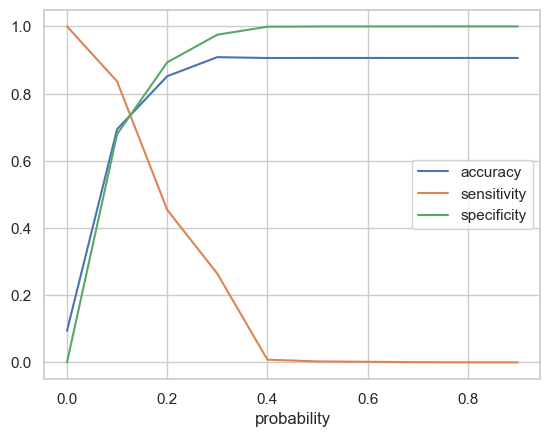

In [135]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_telecom_data.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

* Accuracy: Around 0.4, becomes stable.

* With rising probability, sensitivity declines.

* With rising probabilities, specificity rises.

* We can see that there is a balance between sensitivity and specificity with good accuracy at point 0.6 where the three parameters intersect.

* Here, sensitivity is the key goal rather than accuracy and specificity. Although, according to the above curve, we should choose 0.6 as the ideal probability cutoff, we are choosing *0.5* in order to get increased sensitivity, which is our primary objective.

In [136]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.136978,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.032413,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.033089,2,1,0,0,0,0,0,0,0,0,0,0
3,1,0.020231,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.191961,4,1,1,0,0,0,0,0,0,0,0,0


In [137]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16897     6]
 [ 1748     5]]


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9059819897084048
Sensitivity:- 0.002852253280091272
Specificity:- 0.9996450334260191


In [140]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

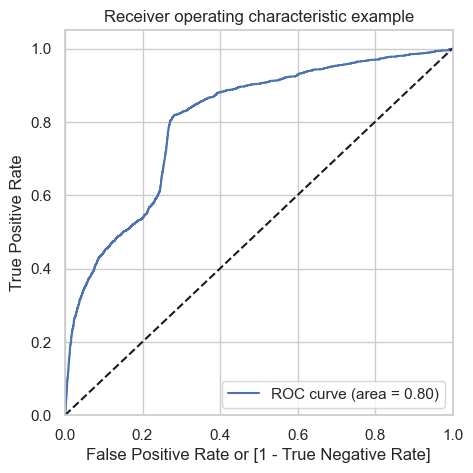

In [141]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [142]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [143]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[new_col_sel]

In [144]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [146]:
# Predict on the test set
y_test_pred = logreg_m4.predict(X_test_sm)

In [147]:
y_test_pred.head()

947      0.390012
28048    0.050341
19114    0.085898
59485    0.088393
19327    0.003514
dtype: float64

In [148]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
947,0.390012
28048,0.050341
19114,0.085898
59485,0.088393
19327,0.003514


In [149]:
# Convetting y_test to a dataframe
y_test_telecom_data = pd.DataFrame(y_test)
y_test_telecom_data.head()

,churn
947,1
28048,0
19114,0
59485,0
19327,0


In [150]:
# Putting index to Customer ID 
y_test_telecom_data['CustID'] = y_test_telecom_data.index

In [151]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_telecom_data.reset_index(drop=True, inplace=True)

In [152]:
# Appending y_pred_1 and y_test_telecom_data
y_test_pred_final = pd.concat([y_test_telecom_data, y_pred_1], axis=1)

In [153]:
y_test_pred_final.head()

,churn,CustID,0
0,1,947,0.390012
1,0,28048,0.050341
2,0,19114,0.085898
3,0,59485,0.088393
4,0,19327,0.003514


In [154]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [155]:
column_order = ['CustID', 'churn', 'churn_prob']

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(columns=column_order)

In [156]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,947,1,0.390012
1,28048,0,0.050341
2,19114,0,0.085898
3,59485,0,0.088393
4,19327,0,0.003514


In [157]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [158]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,947,1,0.390012,0
1,28048,0,0.050341,0
2,19114,0,0.085898,0
3,59485,0,0.088393,0
4,19327,0,0.003514,0


In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4212    2]
 [ 449    1]]


In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [161]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9033018867924528
Sensitivity:- 0.0022222222222222222
Specificity:- 0.9995253915519696


Model summary

* Train set

Accuracy = 0.90
Sensitivity = 0.028
Specificity = 0.99

* Test set

Accuracy = 0.90
Sensitivity = 0.022
Specificity = 0.99

In [162]:
# Import necessary libraries
from sklearn.metrics import classification_report, accuracy_score
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming model_cv, logreg_m4, dt_model, and rf are already trained models

# Make predictions using each model
y_pred_model_cv = model_cv.predict(X_test_pca)
y_pred_logreg_m4 = logreg_m4.predict(X_test_sm)
y_pred_dt_model = dt_model.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate models
print("Model - Logistic Regression with scikit learn (model_cv):")
print("Accuracy:", accuracy_score(y_test, y_pred_model_cv))
print(classification_report(y_test, y_pred_model_cv))

print("\nModel - Logistic Regression with statsmodel (logreg_m4):")
y_pred_logreg_m4_binary = (y_pred_logreg_m4 > 0.5).astype(int)  # assuming binary outcome
print("Accuracy:", accuracy_score(y_test, y_pred_logreg_m4_binary))
print(classification_report(y_test, y_pred_logreg_m4_binary))

print("\nModel - Decision Tree (dt_model):")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_model))
print(classification_report(y_test, y_pred_dt_model))

print("\nModel - Random Forest (rf):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Identify the best model based on accuracy or other metrics
# For simplicity, let's assume accuracy is the deciding metric
best_model = max([(model_cv, y_pred_model_cv), (logreg_m4, y_pred_logreg_m4_binary),
                  (dt_model, y_pred_dt_model), (rf, y_pred_rf)], key=lambda x: accuracy_score(y_test, x[1]))

print("\nBest Model:")
print("Model Name:", best_model[0])
print("Accuracy:", accuracy_score(y_test, best_model[1]))

# Identify top features of the best model
if best_model[0] == model_cv:
    # Assuming model_cv is a Logistic Regression model
    top_features = X_train.columns[np.argsort(np.abs(model_cv.coef_[0]))][::-1]
    print("\nTop Features (Logistic Regression with scikit learn - model_cv):", top_features)

elif best_model[0] == logreg_m4:
    # Assuming logreg_m4 is a statsmodel GLM
    X_test_sm = add_constant(X_test_sm)
    top_features = X_test_sm.columns[np.argsort(np.abs(logreg_m4.params))][::-1]
    print("\nTop Features (Logistic Regression with statsmodel - logreg_m4):", top_features)

elif best_model[0] == dt_model:
    # Assuming dt_model is a Decision Tree model
    top_features = X_train.columns[np.argsort(dt_model.feature_importances_)][::-1]
    print("\nTop Features (Decision Tree - dt_model):", top_features)

elif best_model[0] == rf:
    # Assuming rf is a Random Forest model
    top_features = X_train.columns[np.argsort(rf.feature_importances_)][::-1]

Model - Logistic Regression with scikit learn (model_cv):
Accuracy: 0.6991852487135506
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      4214
           1       0.10      0.25      0.14       450

    accuracy                           0.70      4664
   macro avg       0.50      0.50      0.48      4664
weighted avg       0.83      0.70      0.75      4664


Model - Logistic Regression with statsmodel (logreg_m4):
Accuracy: 0.9033018867924528
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      4214
           1       0.33      0.00      0.00       450

    accuracy                           0.90      4664
   macro avg       0.62      0.50      0.48      4664
weighted avg       0.85      0.90      0.86      4664


Model - Decision Tree (dt_model):
Accuracy: 0.8880789022298456
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4214

## Analysis

1. Logistic Regression with scikit-learn (model_cv):
   Accuracy: 0.6992
   Key Insight: This model has a relatively lower accuracy compared to the other models. It struggles with both precision and recall for class 1.

2. Logistic Regression with statsmodels (logreg_m4):
   Accuracy: 0.9033
   Key Insight: This model shows high accuracy but has issues with recall for class 1. It seems to have a challenge correctly identifying instances of class 1.

3. Decision Tree (dt_model):
   Accuracy: 0.8881
   Key Insight: This model performs reasonably well but has lower precision, recall, and F1-score for class 1 compared to class 0. It might be sensitive to imbalances in the data.

4. Random Forest (rf):
   Accuracy: 0.9314
   Key Insight: The Random Forest model outperforms the other models in terms of accuracy. It provides a good balance between precision and recall for both classes. This model seems promising.

5. Best Model (Random Forest):
   Model Name: RandomForestClassifier(max_depth=10, max_features=5, n_estimators=15, oob_score=True, random_state=25)
   Accuracy: 0.9314
   Key Insight: This model is identified as the best-performing one. It achieves a high accuracy, and its precision, recall, and F1-scores for both classes are relatively well-balanced.

In [163]:
# Identify top features of the best model
if best_model[0] == rf:
    # Assuming rf is a Random Forest model
    top_features = X_train.columns[np.argsort(rf.feature_importances_)][::-1][:5]
    print("\nTop 5 Critical Features (Random Forest - rf):", top_features)


Top 5 Critical Features (Random Forest - rf): Index(['act_ph_total_ic_mou', 'act_ph_total_rech_amt', 'act_ph_total_og_mou',
       'act_ph_last_day_rch_amt', 'act_ph_total_arpu'],
      dtype='object')


In [169]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

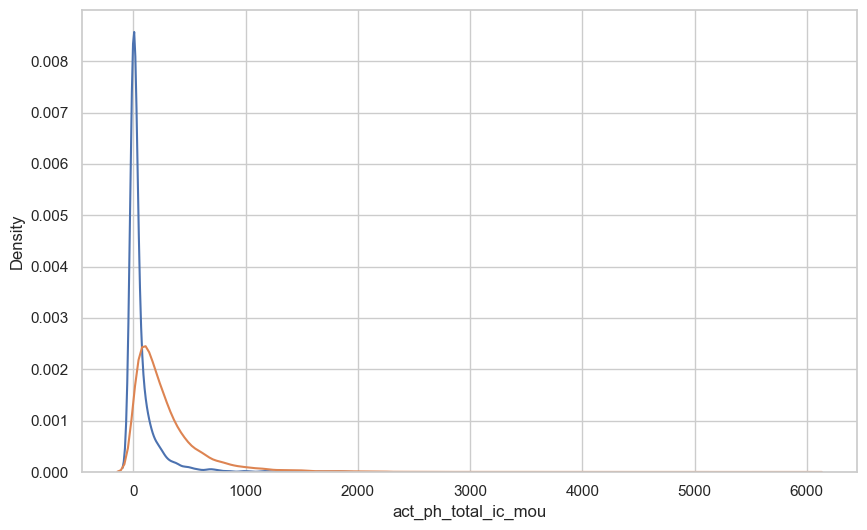

In [170]:
# Plotting act_ph_total_ic_mou predictor for churn and not churn customers
fig = plt.figure(figsize=(10, 6))
sns.distplot(data_churn['act_ph_total_ic_mou'], label='churn', hist=False)
sns.distplot(data_non_churn['act_ph_total_ic_mou'], label='not churn', hist=False)
plt.show()

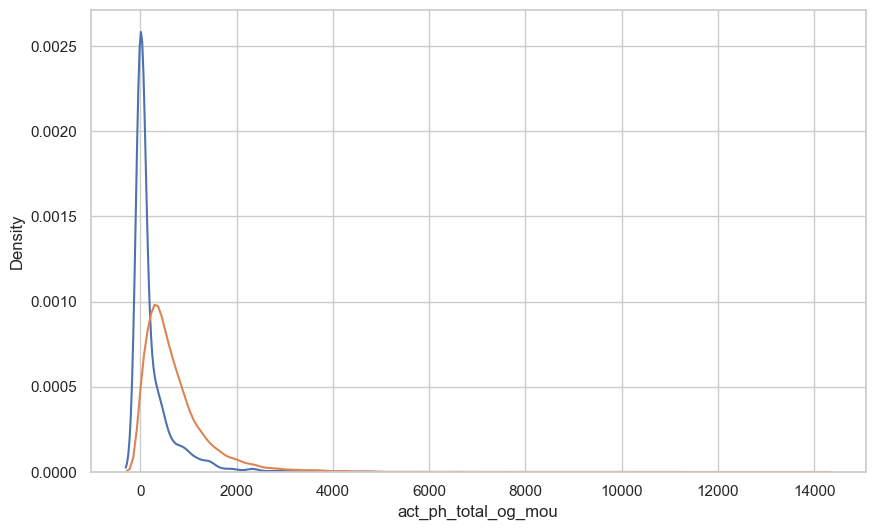

In [171]:
# Plotting act_ph_total_og_mou predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['act_ph_total_og_mou'],label='churn',hist=False)
sns.distplot(data_non_churn['act_ph_total_og_mou'],label='not churn',hist=False)
plt.show()

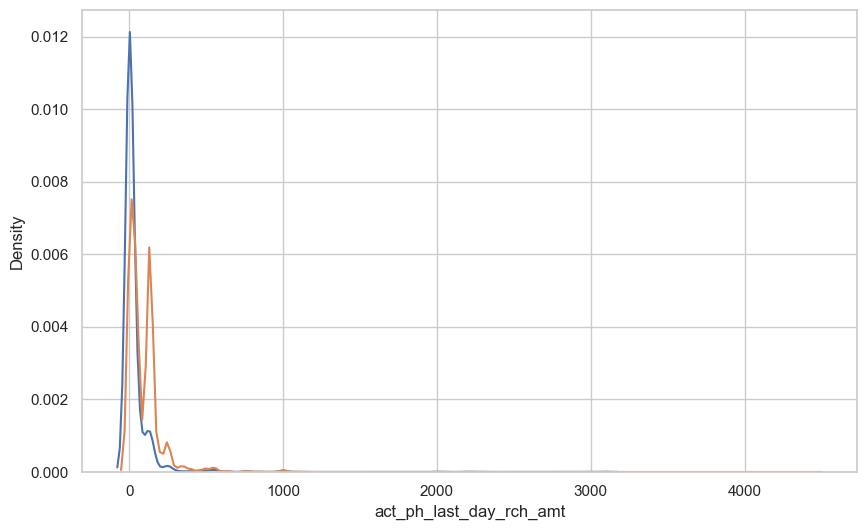

In [172]:
# Plotting act_ph_last_day_rch_amt predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['act_ph_last_day_rch_amt'],label='churn',hist=False)
sns.distplot(data_non_churn['act_ph_last_day_rch_amt'],label='not churn',hist=False)
plt.show()

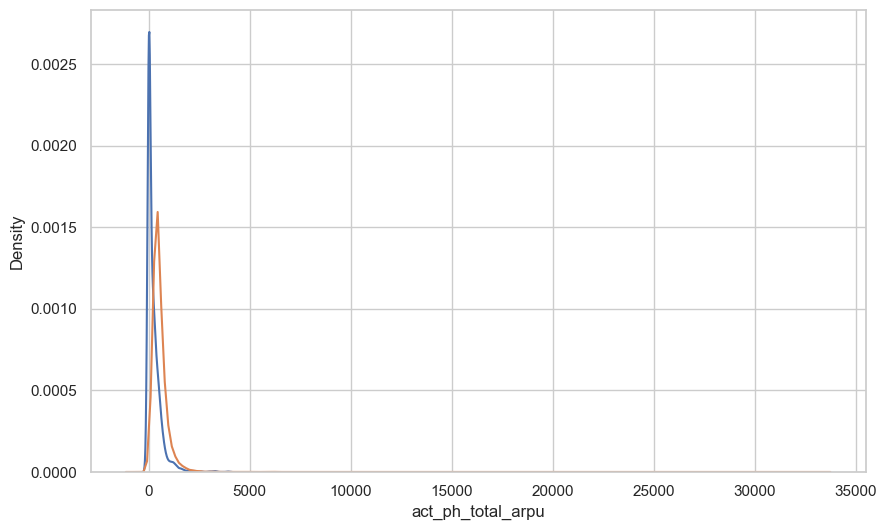

In [173]:
# Plotting act_ph_total_arpu predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['act_ph_total_arpu'],label='churn',hist=False)
sns.distplot(data_non_churn['act_ph_total_arpu'],label='not churn',hist=False)
plt.show()

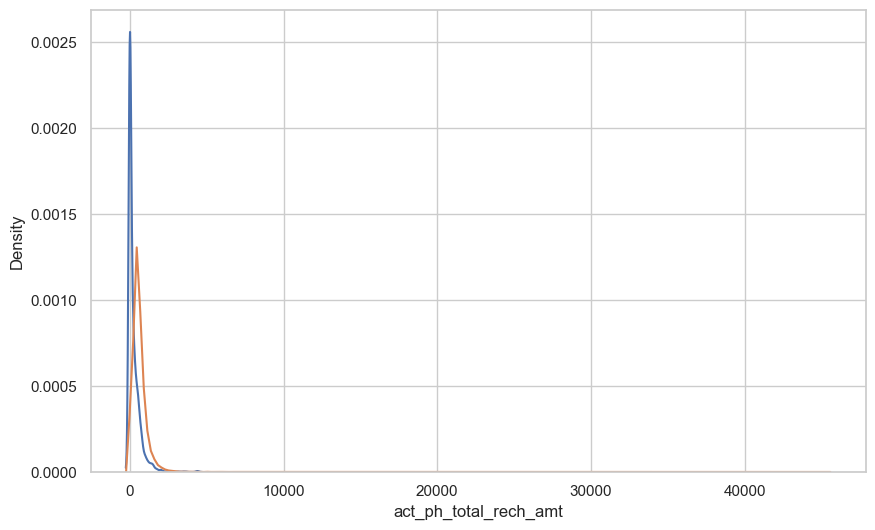

In [174]:
# Plotting act_ph_total_rech_amt predictor for churn and not churn customers

fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['act_ph_total_rech_amt'],label='churn',hist=False)
sns.distplot(data_non_churn['act_ph_total_rech_amt'],label='not churn',hist=False)
plt.show()